In [63]:
from IPython.display import HTML
HTML('''<script>
  code_show=true;
  function code_toggle() {
    if (code_show){
      $('div.input').hide();
    } else {
      $('div.input').show();
    }
    code_show = !code_show
  }
  $( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle code on/off"></form>''')

<h2 style ="font-family:Bell MT;font-size:40px:text-align:center"> Cocoa Future price forecast <h2/>

<h3 style ="font-family:Bell MT;font-size:40px:text-align:center"> Importing neccessary libraries <h3/>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime    # To access datetime 
from matplotlib import pyplot
import seaborn as sns 
import pandas_profiling
import statsmodels.api as sm
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import statsmodels.tsa.api as smt
from statsmodels.tsa.api import VAR
from statsmodels.stats.stattools import durbin_watson

<h3 style ="font-family:Bell MT;font-size:40px:text-align:center"> Loading and cleanning data <h3/>

In [2]:
# Changing the object datatype of Exchange date into datetime64 
df_main = pd.read_csv('LCCc1_oct.csv', parse_dates=['Exchange Date'])
df_main.head()

,Close price,Exchange Date
0,561,2000-01-04
1,560,2000-01-05
2,556,2000-01-06
3,564,2000-01-07
4,565,2000-01-10


<h3 style ="font-family:Bell MT;font-size:40px:text-align:center">Price forcast news <h3/>

In [3]:
# Changing "object" datatype of 'coc_mpyns_prfr' Timestamp into datetime format  
df_mpyns_p = pd.read_csv('price_forecast-coc_mpyns_prfr.csv', parse_dates=['Timestamp'])
df_mpyns_p.head()

,LQC(coc_mpyns_prfr),Timestamp
0,0.0,2000-01-01
1,0.0,2000-01-02
2,0.0,2000-01-03
3,0.0,2000-01-04
4,0.0,2000-01-05


In [4]:
# Merging the main dataframe to df_mpyns
df_merge1 = df_main.merge(df_mpyns_p, left_on='Exchange Date', right_on='Timestamp')

In [5]:
df_merge1.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),Timestamp
0,561,2000-01-04,0.000000,2000-01-04
1,560,2000-01-05,0.000000,2000-01-05
2,556,2000-01-06,-0.004343,2000-01-06
3,564,2000-01-07,0.002181,2000-01-07
4,565,2000-01-10,-0.014851,2000-01-10


In [6]:
# Changing the coc_mpys_prfr object datatype to datetime 
df_mpys_p = pd.read_csv('price_forecast-coc_mpys_prfr.csv', parse_dates=['Timestamp'])
df_mpys_p.head()

,LQC(coc_mpys_prfr),Timestamp
0,0.0,2000-01-01
1,0.0,2000-01-02
2,0.0,2000-01-03
3,0.0,2000-01-04
4,0.0,2000-01-05


In [7]:
#df_mpys_p.info()

In [8]:
# Merging df_merge with df_mpys
df_merge2 = df_merge1.merge(df_mpys_p, left_on='Exchange Date', right_on='Timestamp')
df_merge2.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),Timestamp_x,LQC(coc_mpys_prfr),Timestamp_y
0,561,2000-01-04,0.000000,2000-01-04,0.0,2000-01-04
1,560,2000-01-05,0.000000,2000-01-05,0.0,2000-01-05
2,556,2000-01-06,-0.004343,2000-01-06,0.0,2000-01-06
3,564,2000-01-07,0.002181,2000-01-07,0.0,2000-01-07
4,565,2000-01-10,-0.014851,2000-01-10,0.0,2000-01-10


In [171]:
# Deleting the unwanted or duplecated date
del df_merge2['Timestamp_x']
del df_merge2['Timestamp_y']
df_merge2.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr)
0,561,2000-01-04,0.000000,0.0
1,560,2000-01-05,0.000000,0.0
2,556,2000-01-06,-0.004343,0.0
3,564,2000-01-07,0.002181,0.0
4,565,2000-01-10,-0.014851,0.0


In [172]:
# Changing the coc_mpys_prfr object datatype to datetime 
df_mpyn_p = pd.read_csv('price_forecast-coc_mpyn_prfr.csv', parse_dates=['Timestamp'])
df_mpyn_p.head()

,LQC(coc_mpyn_prfr),Timestamp
0,0.0,2000-01-01
1,0.0,2000-01-02
2,0.0,2000-01-03
3,0.0,2000-01-04
4,0.0,2000-01-05


In [173]:
# Merging
df_merge3 = df_merge2.merge(df_mpyn_p, left_on='Exchange Date', right_on='Timestamp')
df_merge3.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),Timestamp
0,561,2000-01-04,0.000000,0.0,0.000000,2000-01-04
1,560,2000-01-05,0.000000,0.0,0.000000,2000-01-05
2,556,2000-01-06,-0.004343,0.0,-0.004343,2000-01-06
3,564,2000-01-07,0.002181,0.0,0.002181,2000-01-07
4,565,2000-01-10,-0.014851,0.0,-0.014851,2000-01-10


In [174]:
# delete the unwanted time "Timestamp"
del df_merge3['Timestamp']
df_merge3.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr)
0,561,2000-01-04,0.000000,0.0,0.000000
1,560,2000-01-05,0.000000,0.0,0.000000
2,556,2000-01-06,-0.004343,0.0,-0.004343
3,564,2000-01-07,0.002181,0.0,0.002181
4,565,2000-01-10,-0.014851,0.0,-0.014851


<h3 style ="font-family:Bell MT;font-size:40px:text-align:center"> Weather damage news <h3/>

In [175]:
# Changing the 'object' datatype into 'datetime' 
df_mpyns_w = pd.read_csv('weather_damage_coc-mpyns-wdam.csv', parse_dates=['Timestamp'])
df_mpyns_w.head()

,LQC(coc-mpyns-wdam),Timestamp
0,0.018868,2000-01-01
1,0.123457,2000-01-02
2,0.014085,2000-01-03
3,0.000000,2000-01-04
4,0.000000,2000-01-05


In [176]:
#df_mpyns_w.info()

In [177]:
# Merging 'df_mpyns_w' with 'df_merge3'
df_merge4 = df_merge3.merge(df_mpyns_w, left_on='Exchange Date', right_on='Timestamp')
df_merge4.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),Timestamp
0,561,2000-01-04,0.000000,0.0,0.000000,0.000000,2000-01-04
1,560,2000-01-05,0.000000,0.0,0.000000,0.000000,2000-01-05
2,556,2000-01-06,-0.004343,0.0,-0.004343,0.006369,2000-01-06
3,564,2000-01-07,0.002181,0.0,0.002181,0.000000,2000-01-07
4,565,2000-01-10,-0.014851,0.0,-0.014851,0.000000,2000-01-10


In [178]:
# delete the unwanted time "Timestamp"
del df_merge4['Timestamp']
df_merge4.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam)
0,561,2000-01-04,0.000000,0.0,0.000000,0.000000
1,560,2000-01-05,0.000000,0.0,0.000000,0.000000
2,556,2000-01-06,-0.004343,0.0,-0.004343,0.006369
3,564,2000-01-07,0.002181,0.0,0.002181,0.000000
4,565,2000-01-10,-0.014851,0.0,-0.014851,0.000000


In [179]:
# Changing the 'object' datatype into 'datetime' 
df_mpyn_w = pd.read_csv('weather_damage_coc-mpyn-wdam.csv', parse_dates=['Timestamp'])
df_mpyn_w.head()

,LQC(coc-mpyn-wdam),Timestamp
0,0.000000,2000-01-01
1,0.000000,2000-01-02
2,0.333333,2000-01-03
3,0.000000,2000-01-04
4,0.000000,2000-01-05


In [180]:
# Merging 'df_mpyn_w' with 'df_merge4'
df_merge5 = df_merge4.merge(df_mpyn_w, left_on='Exchange Date', right_on='Timestamp')
df_merge5.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam),Timestamp
0,561,2000-01-04,0.000000,0.0,0.000000,0.000000,0.000000,2000-01-04
1,560,2000-01-05,0.000000,0.0,0.000000,0.000000,0.000000,2000-01-05
2,556,2000-01-06,-0.004343,0.0,-0.004343,0.006369,0.095238,2000-01-06
3,564,2000-01-07,0.002181,0.0,0.002181,0.000000,0.000000,2000-01-07
4,565,2000-01-10,-0.014851,0.0,-0.014851,0.000000,0.000000,2000-01-10


In [181]:
# delete the unwanted time "Timestamp"
del df_merge5['Timestamp']
df_merge5.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam)
0,561,2000-01-04,0.000000,0.0,0.000000,0.000000,0.000000
1,560,2000-01-05,0.000000,0.0,0.000000,0.000000,0.000000
2,556,2000-01-06,-0.004343,0.0,-0.004343,0.006369,0.095238
3,564,2000-01-07,0.002181,0.0,0.002181,0.000000,0.000000
4,565,2000-01-10,-0.014851,0.0,-0.014851,0.000000,0.000000


In [182]:
# Changing the 'object' datatype into 'datetime' 
df_mpys_w = pd.read_csv('weather_damage_coc-mpys-wdam.csv', parse_dates=['Timestamp'])
df_mpys_w.head()

,LQC(coc-mpys-wdam),Timestamp
0,0.018868,2000-01-01
1,0.123457,2000-01-02
2,0.014085,2000-01-03
3,0.000000,2000-01-04
4,0.000000,2000-01-05


In [183]:
# Merging 'df_mpyn_w' with 'df_merge5'
df_merge6 = df_merge5.merge(df_mpys_w, left_on='Exchange Date', right_on='Timestamp')
df_merge6.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam),LQC(coc-mpys-wdam),Timestamp
0,561,2000-01-04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2000-01-04
1,560,2000-01-05,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2000-01-05
2,556,2000-01-06,-0.004343,0.0,-0.004343,0.006369,0.095238,0.006369,2000-01-06
3,564,2000-01-07,0.002181,0.0,0.002181,0.000000,0.000000,0.000000,2000-01-07
4,565,2000-01-10,-0.014851,0.0,-0.014851,0.000000,0.000000,0.000000,2000-01-10


In [184]:
# delete the unwanted time "Timestamp"
del df_merge6['Timestamp']
df_merge6.head()

,Close price,Exchange Date,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam),LQC(coc-mpys-wdam)
0,561,2000-01-04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,560,2000-01-05,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,556,2000-01-06,-0.004343,0.0,-0.004343,0.006369,0.095238,0.006369
3,564,2000-01-07,0.002181,0.0,0.002181,0.000000,0.000000,0.000000
4,565,2000-01-10,-0.014851,0.0,-0.014851,0.000000,0.000000,0.000000


In [185]:
# Total extracted data
#df_merge6.info()

In [186]:
# Change the datatype of close price in to int
df_merge6['Close price'] = df_merge6['Close price'].str.replace(',','').astype(int) # Replace the comma ',' by nothing and change the data type of close price to integer 

In [187]:
# Change the column name of close price, and Exchange Date  
df_merge6.rename(columns={'Close price':'Close_price', 'Exchange Date':'Timestamp'
                         }, inplace=True)
 
#print(df_merge6.columns) # Check the changed column names 

In [188]:
#df_merge6.info()

<h3 style ="font-family:Bell MT;font-size:40px:text-align:center"> EDA (Exploratory Data Analysis) <h3/>

<h3 style ="font-family:Bell MT;font-size:40px:text-align:center"> General exploratory analysis report can be found in "output.html" file  <h3/>

In [189]:
df_merge6.head()

,Close_price,Timestamp,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam),LQC(coc-mpys-wdam)
0,561,2000-01-04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,560,2000-01-05,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,556,2000-01-06,-0.004343,0.0,-0.004343,0.006369,0.095238,0.006369
3,564,2000-01-07,0.002181,0.0,0.002181,0.000000,0.000000,0.000000
4,565,2000-01-10,-0.014851,0.0,-0.014851,0.000000,0.000000,0.000000


In [190]:
# Check the shape of the dataset
df_merge6.shape # The preproccesed dataset is 4808 rows by 8 column.

(4808, 8)

In [191]:
# General quantitative description of the data 
df_merge6.describe()

,Close_price,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam),LQC(coc-mpys-wdam)
count,4808.000000,4808.000000,4808.000000,4808.000000,4808.000000,4808.000000,4808.000000
mean,1429.751664,0.000824,0.001892,0.000824,0.025440,0.063489,0.025440
std,519.695129,0.004773,0.027485,0.004773,0.033412,0.165098,0.033412
min,508.000000,-0.050505,-0.200000,-0.050505,-0.024390,-1.000000,-0.024390
25%,914.000000,0.000000,0.000000,0.000000,0.003840,0.000000,0.003840
50%,1479.000000,0.000000,0.000000,0.000000,0.014087,0.000000,0.014087
75%,1856.000000,0.001726,0.000000,0.001726,0.036103,0.043908,0.036103
max,2713.000000,0.053425,1.000000,0.053425,0.571429,1.000000,0.571429


In [192]:
# Check the correlation between the variables (Correlation Matrix)
# Calculate the correlation cooeficient between the variables (Pearson correlation coefficient)
correlations = df_merge6.corr()
correlations

,Close_price,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam),LQC(coc-mpys-wdam)
Close_price,1.000000,0.104243,0.030297,0.104243,-0.290673,0.072266,-0.290673
LQC(coc_mpyns_prfr),0.104243,1.000000,0.023747,1.000000,-0.067030,0.006496,-0.067030
LQC(coc_mpys_prfr),0.030297,0.023747,1.000000,0.023747,-0.009772,-0.012036,-0.009772
LQC(coc_mpyn_prfr),0.104243,1.000000,0.023747,1.000000,-0.067030,0.006496,-0.067030
LQC(coc-mpyns-wdam),-0.290673,-0.067030,-0.009772,-0.067030,1.000000,0.071102,1.000000
LQC(coc-mpyn-wdam),0.072266,0.006496,-0.012036,0.006496,0.071102,1.000000,0.071102
LQC(coc-mpys-wdam),-0.290673,-0.067030,-0.009772,-0.067030,1.000000,0.071102,1.000000


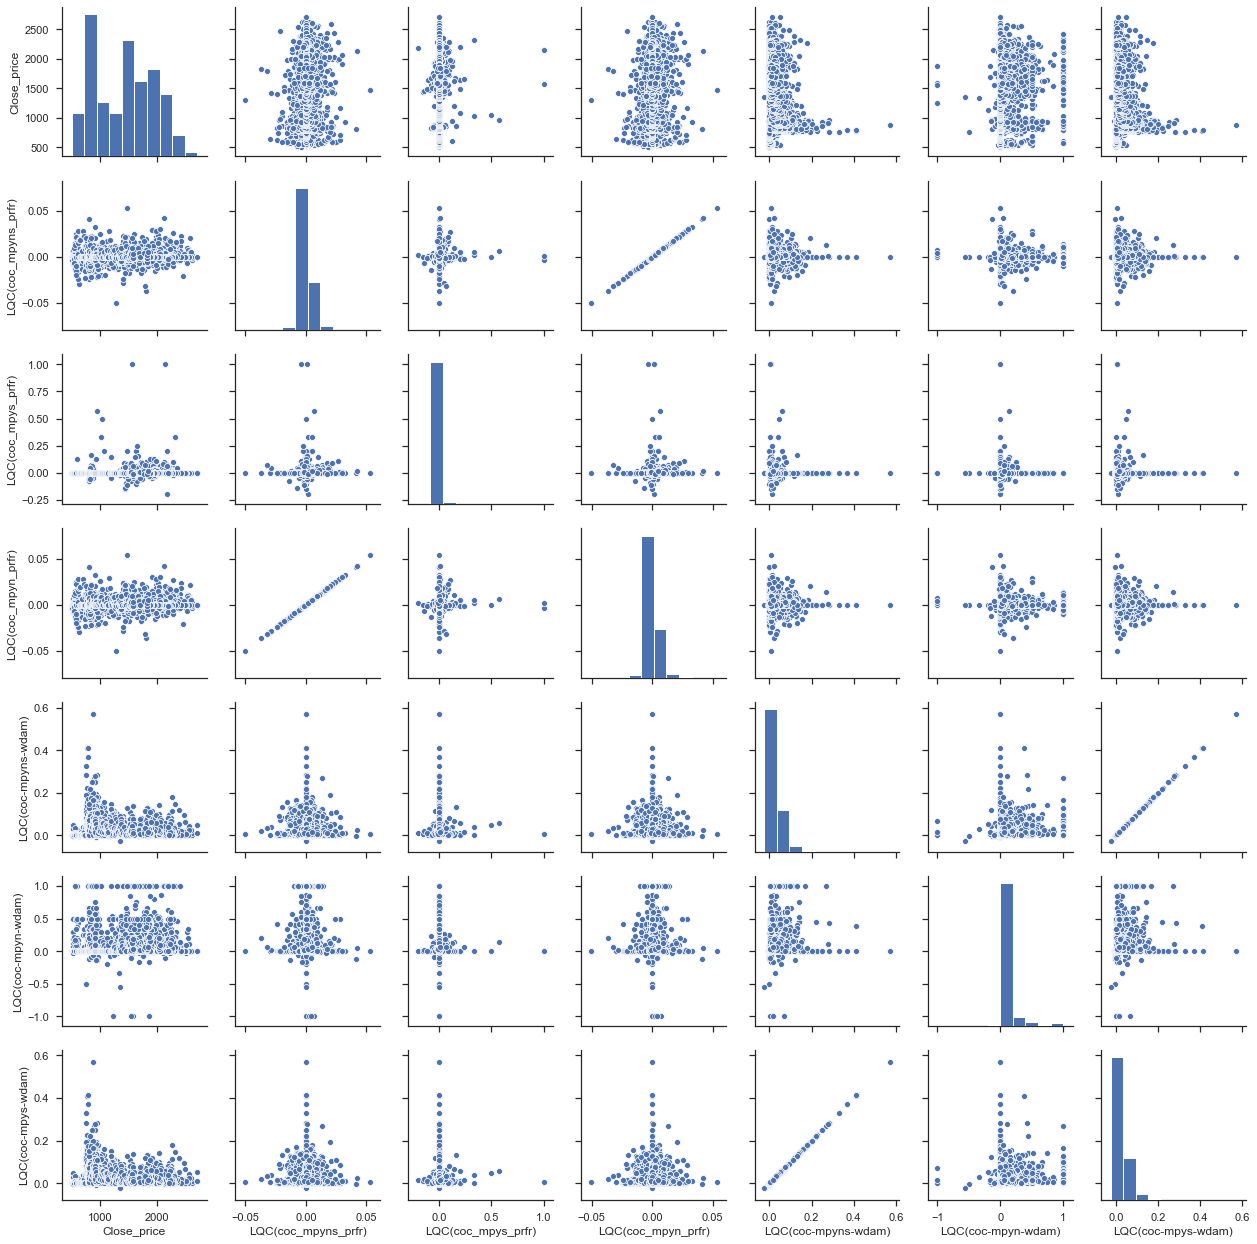

In [193]:
# Pairplot to visualize the correlation between the variables
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_merge6)

In [194]:
# Drop(delete) highly correlated variables "LQC(coc-mpys-wdam)"   
del df_merge6['LQC(coc-mpys-wdam)']
df_merge6.head()

,Close_price,Timestamp,LQC(coc_mpyns_prfr),LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam)
0,561,2000-01-04,0.000000,0.0,0.000000,0.000000,0.000000
1,560,2000-01-05,0.000000,0.0,0.000000,0.000000,0.000000
2,556,2000-01-06,-0.004343,0.0,-0.004343,0.006369,0.095238
3,564,2000-01-07,0.002181,0.0,0.002181,0.000000,0.000000
4,565,2000-01-10,-0.014851,0.0,-0.014851,0.000000,0.000000


In [195]:
# Drop(delete) highly correlated variables "LQC(coc_mpyns_prfr)"
del df_merge6['LQC(coc_mpyns_prfr)']
df_merge6.head()

,Close_price,Timestamp,LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam)
0,561,2000-01-04,0.0,0.000000,0.000000,0.000000
1,560,2000-01-05,0.0,0.000000,0.000000,0.000000
2,556,2000-01-06,0.0,-0.004343,0.006369,0.095238
3,564,2000-01-07,0.0,0.002181,0.000000,0.000000
4,565,2000-01-10,0.0,-0.014851,0.000000,0.000000


In [196]:
# IQR scores (True(Presence of outlier) and False values)
#print(df_merge6 < (Q1 - 1.5 * IQR)) |(df_merge6 > (Q3 + 1.5 * IQR)).to_html('table.html')

<h3 style = "font-family:Bell MT;font-size:40px:text-align:center">Box Plot<h3/>

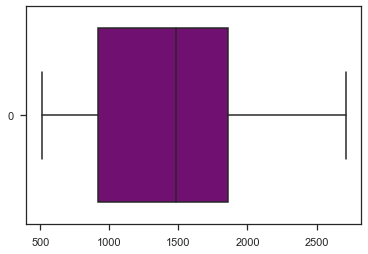

In [197]:
# Boxplot of close_price
sns.boxplot(data=df_merge6['Close_price'], color = 'purple', orient="h")

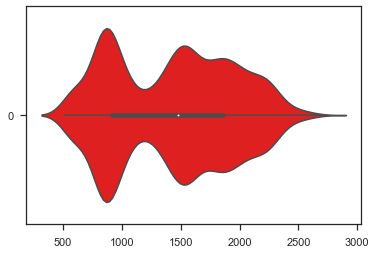

In [198]:
# Violin plot of Close_price
sns.violinplot(data=df_merge6['Close_price'], color = 'red', orient="h")

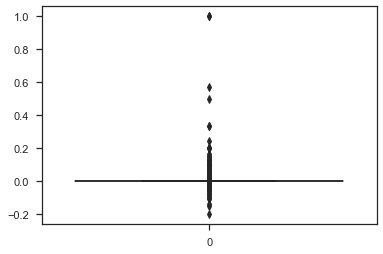

In [199]:
# Boxplot of close_price "LQC(coc_mpys_prfr)"
sns.boxplot(data=df_merge6['LQC(coc_mpys_prfr)'], color = 'purple')

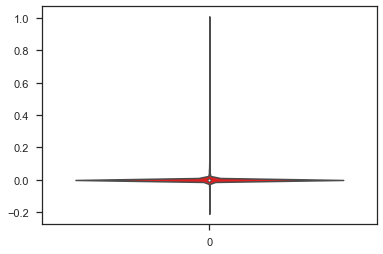

In [200]:
# Violinplot of 'LQC(coc_mpys_prfr)'
sns.violinplot(data=df_merge6['LQC(coc_mpys_prfr)'], color = 'red')

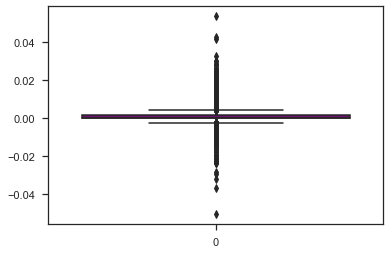

In [201]:
# Boxplot of close_price "LQC(coc_mpyn_prfr)"
sns.boxplot(data=df_merge6['LQC(coc_mpyn_prfr)'], color = 'purple')

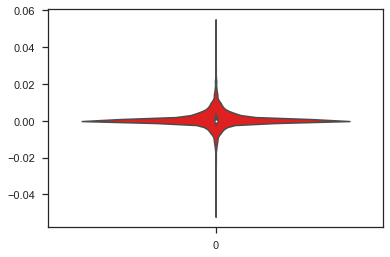

In [202]:
# Violin plot of "LQC(coc_mpyn_prfr)"
sns.violinplot(data=df_merge6['LQC(coc_mpyn_prfr)'], color = 'red')

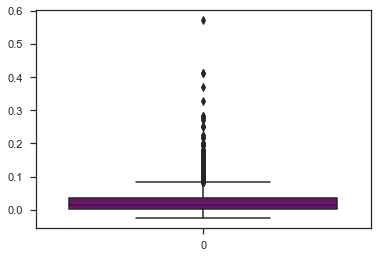

In [203]:
# Boxplot of close_price "LQC(coc-mpyns-wdam)"
sns.boxplot(data=df_merge6['LQC(coc-mpyns-wdam)'], color = 'purple')

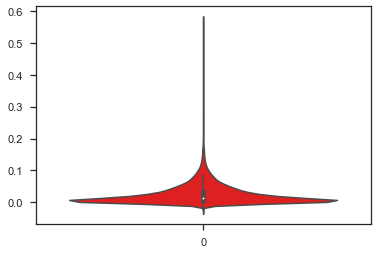

In [204]:
# Violin plot of "LQC(coc-mpyns-wdam)"
sns.violinplot(data=df_merge6['LQC(coc-mpyns-wdam)'], color = 'red')

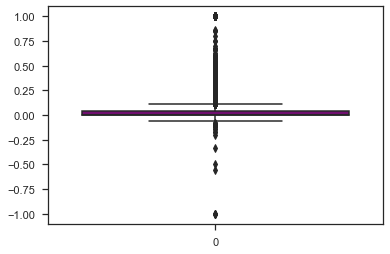

In [205]:
# Boxplot of "LQC(coc-mpyn-wdam)"
sns.boxplot(data=df_merge6['LQC(coc-mpyn-wdam)'], color = 'purple')

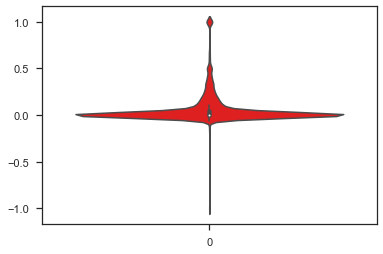

In [206]:
# Violinplot of "LQC(coc-mpyn-wdam)"
sns.violinplot(data=df_merge6['LQC(coc-mpyn-wdam)'], color = 'red')

<h3 style = "font-family:Bell MT;font-size:40px:text-align:center"> PCA Plot <h3/>

In [207]:
from sklearn.preprocessing import StandardScaler
feat_1 = ['LQC(coc_mpys_prfr)', 'LQC(coc_mpyn_prfr)'] 
feat_2 = ['LQC(coc-mpyns-wdam)','LQC(coc-mpyn-wdam)']

In [208]:
# Take ,out the feature of price forecast news
feat_1x = df_merge6.loc[:, feat_1].values
# Take ,out the feature of weather damage news   
feat_2x = df_merge6.loc[:, feat_2].values
# Separating out the target
y = df_merge6.loc[:,['Close_price']].values
# Standardizing the features of price forecast news
Tx1 = StandardScaler().fit_transform(feat_1x) # dataset’s features onto unit scale (mean = 0 and variance = 1)
Tx2 = StandardScaler().fit_transform(feat_2x) # dataset’s features onto unit scale (mean = 0 and variance = 1)

In [209]:
from sklearn.decomposition import PCA
# PCA for price forecast
pca1 = PCA(n_components=1)
#pca.fit(Tx1)
pro_comp_x1 = pca1.fit_transform(Tx1)
# Comparing the previous data with the projected one
print(Tx1.shape)
print(pro_comp_x1.shape)

(4808, 2)
(4808, 1)


In [210]:
# PCA for Weather Damage
pca2 = PCA(n_components=1)
#pca.fit(Tx2)
pro_comp_x2 = pca2.fit_transform(Tx2)
print(Tx2.shape)
print(pro_comp_x2.shape)

(4808, 2)
(4808, 1)


In [211]:
# To see how much information we lose when we convevrt 2 dimentional into 1 dimention in both 
pca1_info = pca1.explained_variance_ratio_ # This shows that almost around 51% of the information is contained in priceforecast data converted principal components
pca2_info = pca2.explained_variance_ratio_ # This shows that almost around 53% of the information is contained in weatherdamage data converted principal components
print(pca1_info, pca2_info)

[0.51187331] [0.5355508]


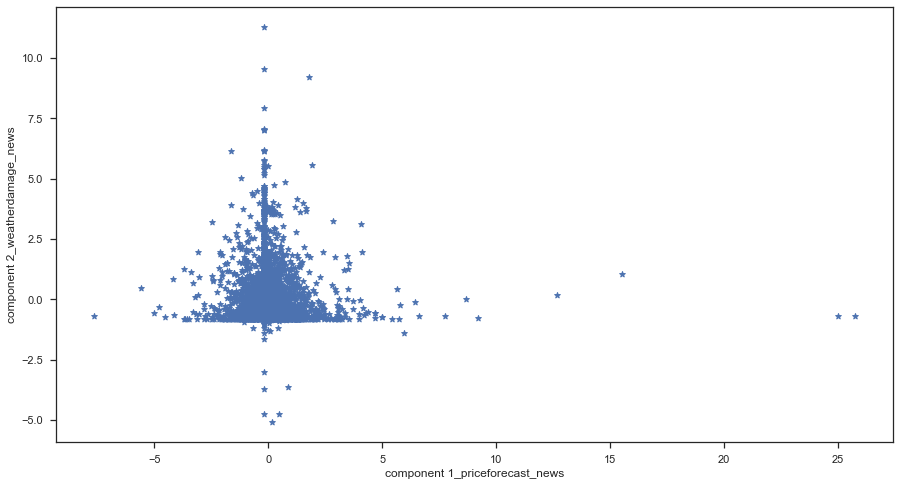

In [212]:
# PCA plot of component 1_priceforecast_news and component 2_weatherdamage_news
plt.figure(figsize=(15,8))
plt.scatter(pro_comp_x1, pro_comp_x2, marker='*')
plt.xlabel('component 1_priceforecast_news')
plt.ylabel('component 2_weatherdamage_news')
plt.show()

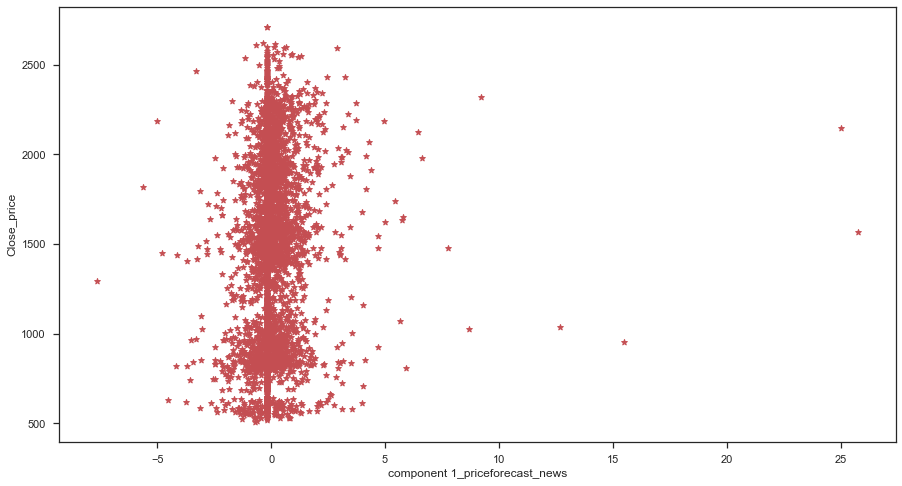

In [213]:
# plot with pca_priceforecast and Close_price
plt.figure(figsize=(15,8))
plt.scatter(pro_comp_x1, df_merge6['Close_price'], c = 'r', marker='*')
plt.xlabel('component 1_priceforecast_news')
plt.ylabel('Close_price')
plt.show()

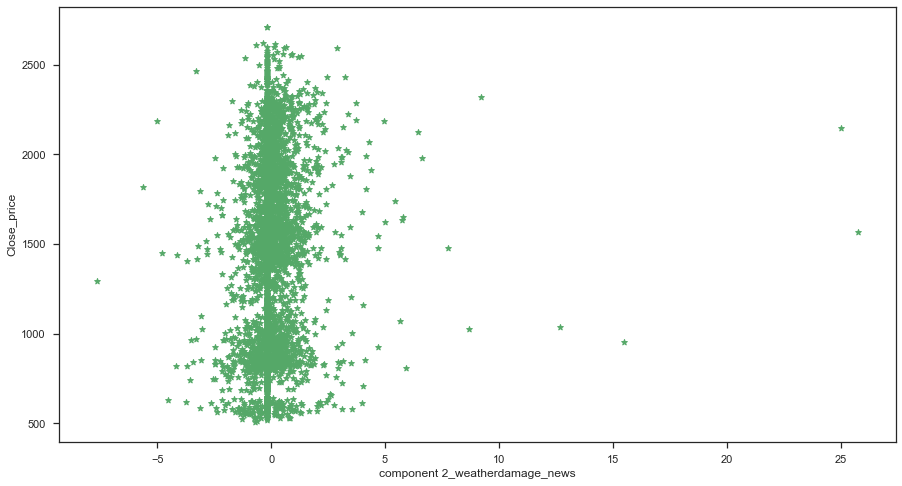

In [214]:
# Plot pca with pca_weatherdamage and Close_price
plt.figure(figsize=(15,8))
plt.scatter(pro_comp_x1, df_merge6['Close_price'], c = 'g', marker='*')
plt.xlabel('component 2_weatherdamage_news')
plt.ylabel('Close_price')
plt.show()

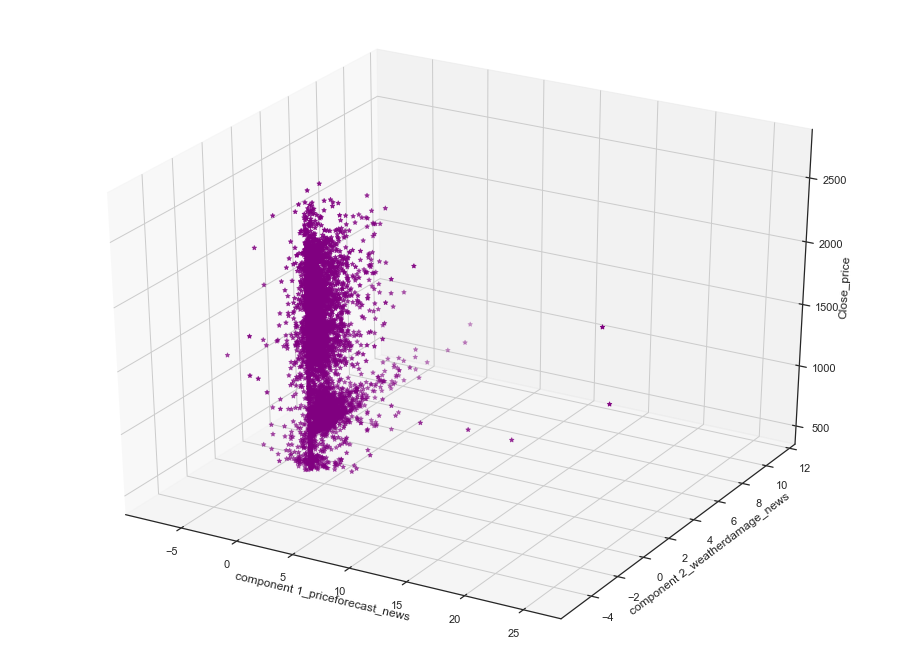

In [215]:
# 3D plot: PCA plot with the first principal components with close price and Timedate
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection ='3d')

x = pro_comp_x1
y = pro_comp_x2
z = df_merge6['Close_price']

ax.scatter(x,y,z, c = 'purple', marker='*')

ax.set_xlabel('component 1_priceforecast_news')
ax.set_ylabel('component 2_weatherdamage_news')
ax.set_zlabel('Close_price')

plt.show()

<h3 style = "font-family:Bell MT;font-size:40px:text-align:center"> Elimination of the outliers <h3/>

<h3 style = "font-family:Bell MT;font-size:40px:text-align:center"> Qurtile-based flooring and copping <h3/> 

In [216]:
# LQC(coc_mpys_prfr)
print(df_merge6['LQC(coc_mpys_prfr)'].quantile(0.10))
print(df_merge6['LQC(coc_mpys_prfr)'].quantile(0.90))

0.0
0.0


In [217]:
df_merge6['LQC(coc_mpys_prfr)'] = np.where(df_merge6['LQC(coc_mpys_prfr)'] <0.0, 0.0, df_merge6['LQC(coc_mpys_prfr)'])
df_merge6['LQC(coc_mpys_prfr)'] = np.where(df_merge6['LQC(coc_mpys_prfr)'] >0.0, 0.0, df_merge6['LQC(coc_mpys_prfr)'])
print(df_merge6['LQC(coc_mpys_prfr)'].skew())

0


In [218]:
# LQC(coc_mpyn_prfr)
print(df_merge6['LQC(coc_mpyn_prfr)'].quantile(0.10))
print(df_merge6['LQC(coc_mpyn_prfr)'].quantile(0.90))

-0.0025710999999999998
0.0053373


In [219]:
df_merge6['LQC(coc_mpyn_prfr)'] = np.where(df_merge6['LQC(coc_mpyn_prfr)'] <-0.0025710999999999998, -0.0025710999999999998, df_merge6['LQC(coc_mpyn_prfr)'])
df_merge6['LQC(coc_mpyn_prfr)'] = np.where(df_merge6['LQC(coc_mpyn_prfr)'] >0.0053373, 0.0053373, df_merge6['LQC(coc_mpyn_prfr)'])
print(df_merge6['LQC(coc_mpyn_prfr)'].skew())

0.7419451294679106


In [220]:
# LQC(coc-mpyns-wdam)
print(df_merge6['LQC(coc-mpyns-wdam)'].quantile(0.10))
print(df_merge6['LQC(coc-mpyns-wdam)'].quantile(0.90))

0.0
0.06475660000000001


In [221]:
df_merge6['LQC(coc-mpyns-wdam)'] = np.where(df_merge6['LQC(coc-mpyns-wdam)'] <0.0, 0.0, df_merge6['LQC(coc-mpyns-wdam)'])
df_merge6['LQC(coc-mpyns-wdam)'] = np.where(df_merge6['LQC(coc-mpyns-wdam)'] >0.06475660000000001, 0.06475660000000001, df_merge6['LQC(coc-mpyns-wdam)'])
print(df_merge6['LQC(coc-mpyns-wdam)'].skew())

0.8456949548310331


In [222]:
# LQC(coc-mpyn-wdam)
print(df_merge6['LQC(coc-mpyn-wdam)'].quantile(0.10))
print(df_merge6['LQC(coc-mpyn-wdam)'].quantile(0.90))

0.0
0.20026190000000016


In [223]:
df_merge6['LQC(coc-mpyn-wdam)'] = np.where(df_merge6['LQC(coc-mpyn-wdam)'] <0.0, 0.0, df_merge6['LQC(coc-mpyn-wdam)'])
df_merge6['LQC(coc-mpyn-wdam)'] = np.where(df_merge6['LQC(coc-mpyn-wdam)'] >0.20026190000000016, 0.20026190000000016, df_merge6['LQC(coc-mpyn-wdam)'])
print(df_merge6['LQC(coc-mpyn-wdam)'].skew())

1.5764767031207434


<h3 style = "font-family:Bell MT;font-size:40px:text-align:center"> Visualization of the data after the elimination of outliers <h3/>

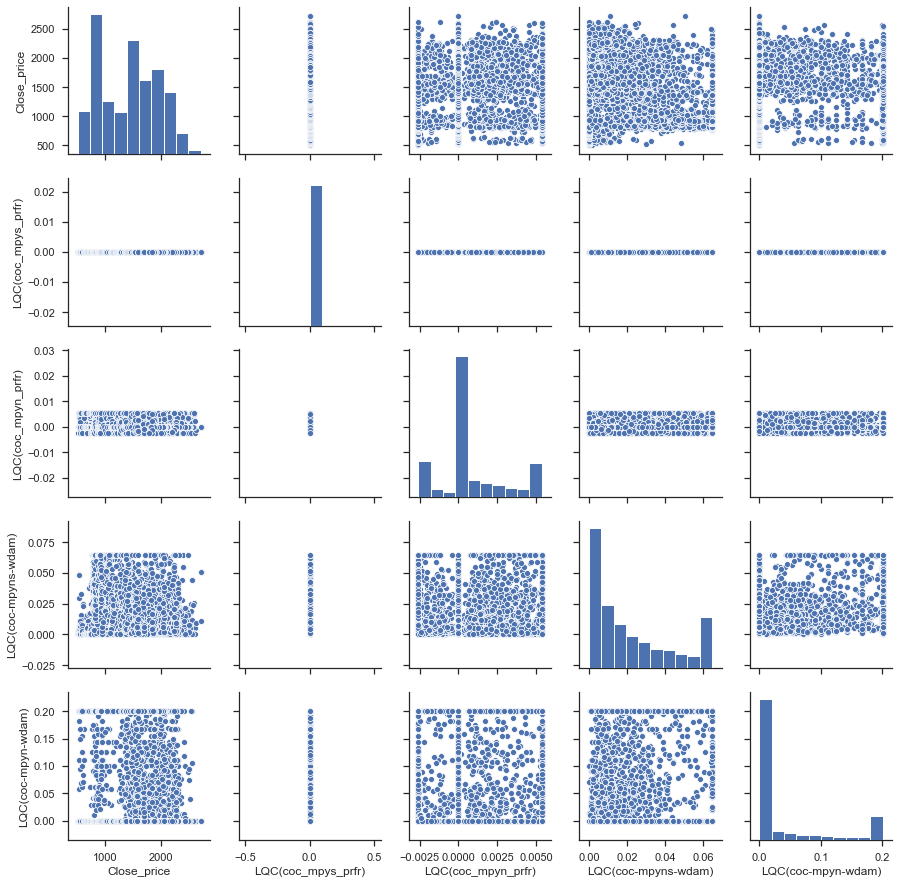

In [224]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_merge6)

<h2 style = "font-family:Bell MT;font-size:40px:text-align:center"> Visualization of the time series data <h2/>
<h3 style = "font-family:Bell MT;font-size:40px:text-align:center"> Indexing and Resampling </h3>

In [225]:
# Change the Index of the dataframe by Timestamp
df_merge7 = df_merge6.set_index('Timestamp')
df_merge7.head()

,Close_price,LQC(coc_mpys_prfr),LQC(coc_mpyn_prfr),LQC(coc-mpyns-wdam),LQC(coc-mpyn-wdam)
Timestamp,,,,,
2000-01-04,561,0.0,0.000000,0.000000,0.000000
2000-01-05,560,0.0,0.000000,0.000000,0.000000
2000-01-06,556,0.0,-0.002571,0.006369,0.095238
2000-01-07,564,0.0,0.002181,0.000000,0.000000
2000-01-10,565,0.0,-0.002571,0.000000,0.000000


<h3 style = "font-family:Bell MT;font-size:40px:text-align:center"> Indexing daily</h3>

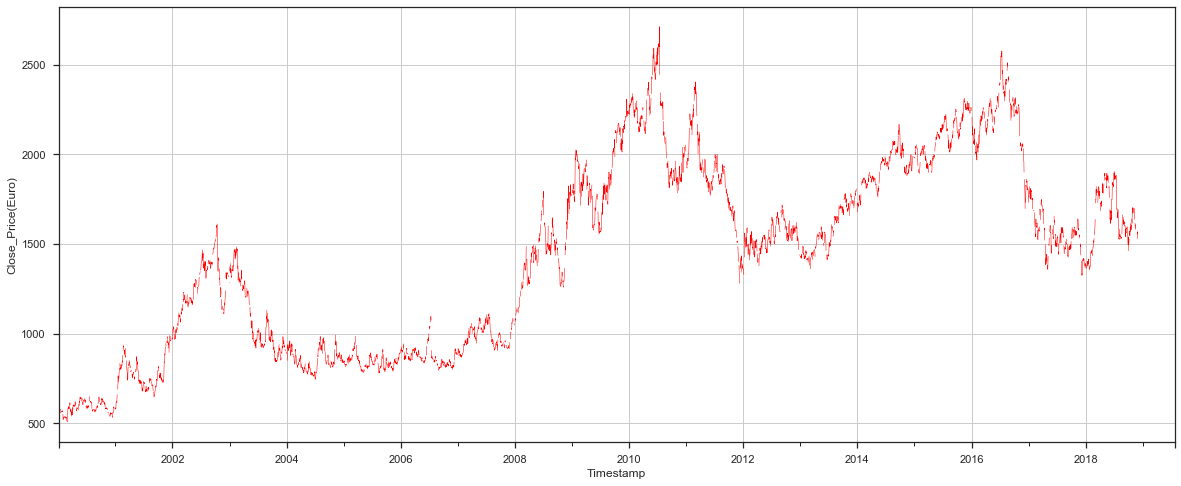

In [233]:
plt.figure(figsize=(20,8))
#plt.title('Yearly close price change or difference')
plt.ylabel("Close_Price(Euro)")
df_merge7.Close_price.resample('D').mean().plot(color='red',linewidth = 0.5, grid = True )

<h3 style = "font-family:Bell MT;font-size:40px:text-align:center"> Indexing weekly <h3/>

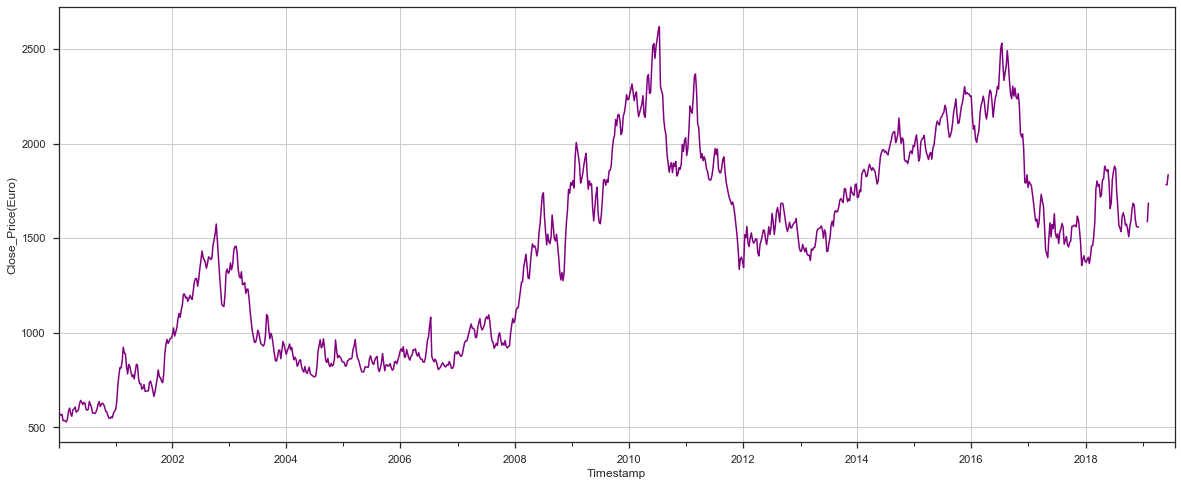

In [231]:
plt.figure(figsize=(20,8))
#plt.title('Quarterly close price change or difference') 
plt.ylabel("Close_Price(Euro)")
df_merge7.Close_price.resample('W').mean().plot(color='purple',  grid = True)

<h3 style = "font-family:Bell MT;font-size:40px:text-align:center"> Pattern (Trend, Seasonal, Cyclic) of Close_price with Timestamp on Monthly basis <h3/>

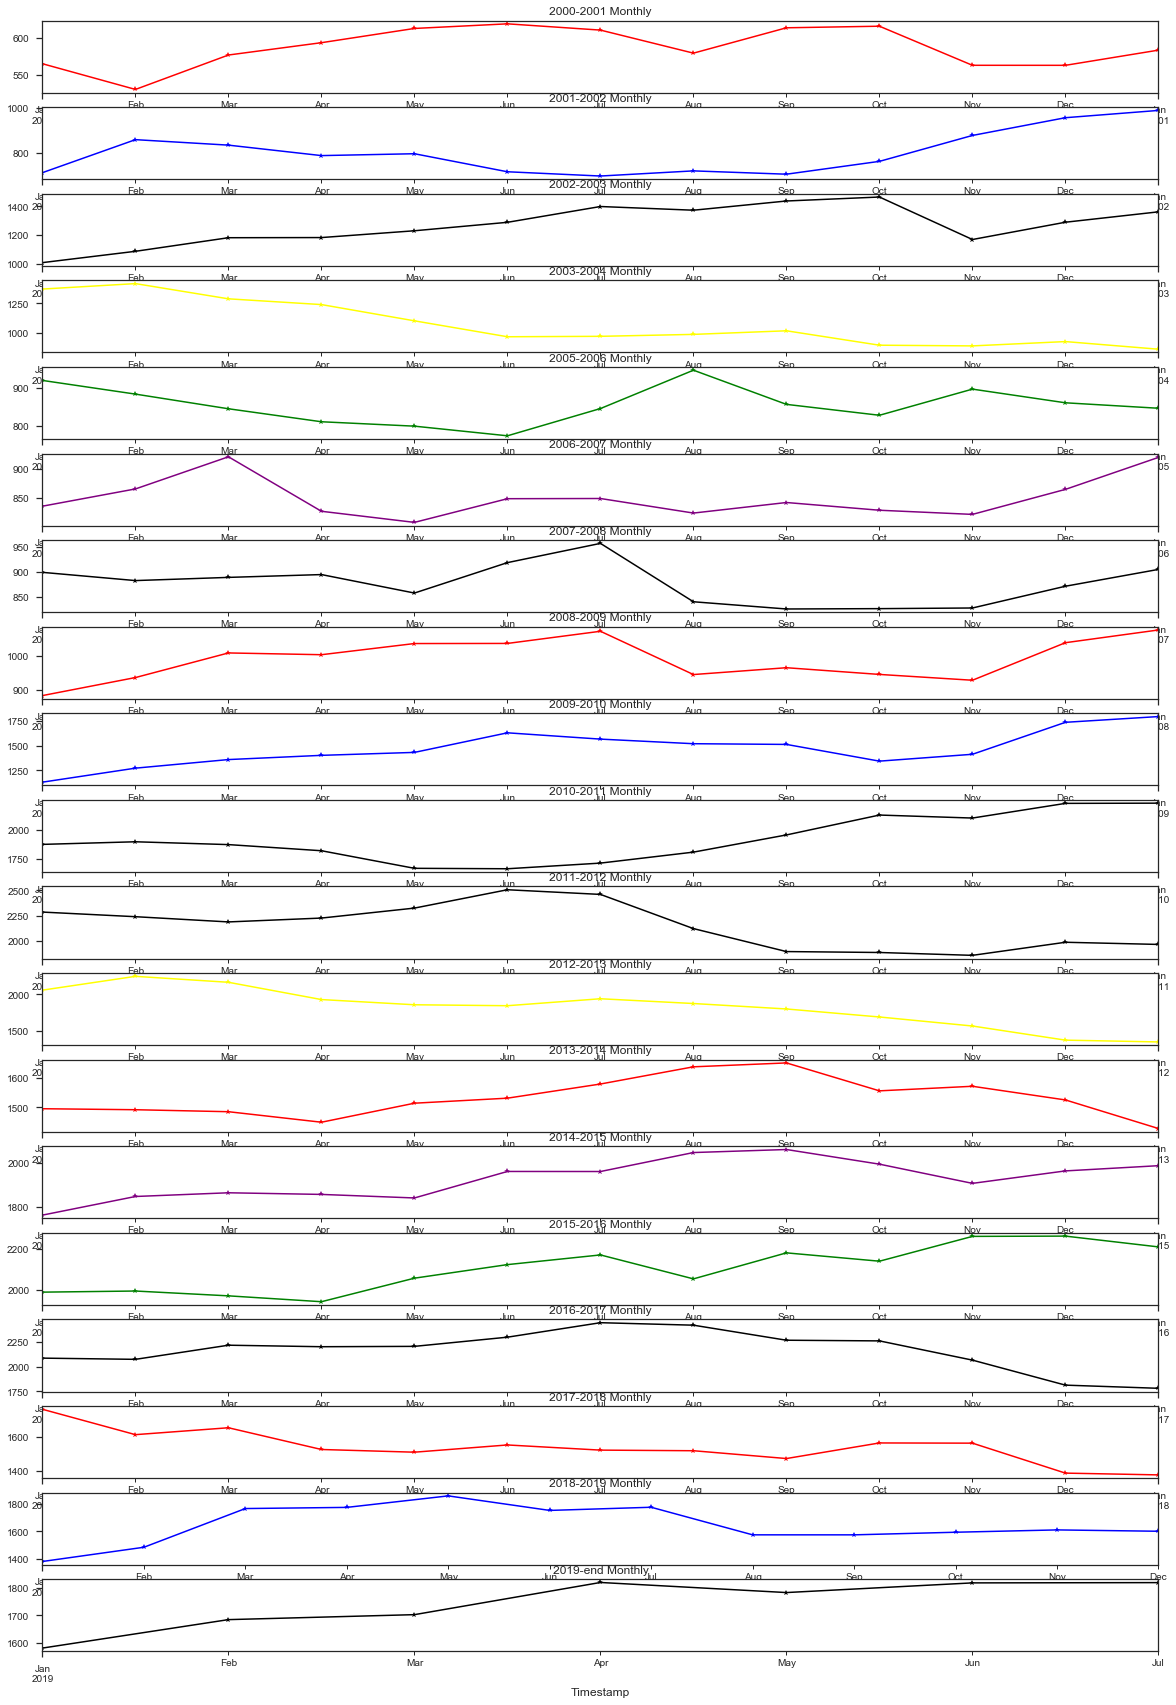

In [234]:
# Resampling the data on monthly with in a year
sam1 = df_merge7["2000-01-04":"2001-01-04"].Close_price.resample('M').mean()
sam2 = df_merge7["2001-01-04":"2002-01-04"].Close_price.resample('M').mean()
sam3 = df_merge7["2002-01-04":"2003-01-04"].Close_price.resample('M').mean()
sam4 = df_merge7["2003-01-04":"2004-01-04"].Close_price.resample('M').mean()
sam5 = df_merge7["2004-01-04":"2005-01-04"].Close_price.resample('M').mean()
sam6 = df_merge7["2005-01-04":"2006-01-04"].Close_price.resample('M').mean()
sam7 = df_merge7["2006-01-04":"2007-01-04"].Close_price.resample('M').mean()
sam8 = df_merge7["2007-01-04":"2008-01-04"].Close_price.resample('M').mean()
sam9 = df_merge7["2008-01-04":"2009-01-04"].Close_price.resample('M').mean()
sam10 = df_merge7["2009-01-04":"2010-01-04"].Close_price.resample('M').mean()

sam11 = df_merge7["2010-01-04":"2011-01-04"].Close_price.resample('M').mean()
sam12 = df_merge7["2011-01-04":"2012-01-04"].Close_price.resample('M').mean()
sam13 = df_merge7["2012-01-04":"2013-01-04"].Close_price.resample('M').mean()
sam14 = df_merge7["2014-01-04":"2015-01-04"].Close_price.resample('M').mean()
sam15 = df_merge7["2015-01-04":"2016-01-04"].Close_price.resample('M').mean()
sam16 = df_merge7["2016-01-04":"2017-01-04"].Close_price.resample('M').mean()
sam17 = df_merge7["2017-01-04":"2018-01-04"].Close_price.resample('M').mean()
sam18 = df_merge7["2018-01-04":"2019-01-04"].Close_price.resample('M').mean()
sam19 = df_merge7["2019-01-04":].Close_price.resample('M').mean()

# plotting
fig, axs = plt.subplots(19,1)
sam1.plot(figsize=(20,30), title= '2000-2001 Monthly', fontsize=10, ax=axs[0], color='red', marker="*")
sam2.plot(figsize=(20,30), title= '2001-2002 Monthly', fontsize=10, ax=axs[1], color='blue', marker="*")
sam3.plot(figsize=(20,30), title= '2002-2003 Monthly', fontsize=10, ax=axs[2], color='black', marker="*")
sam4.plot(figsize=(20,30), title= '2003-2004 Monthly', fontsize=10, ax=axs[3], color='yellow', marker="*")
sam5.plot(figsize=(20,30), title= '2005-2006 Monthly', fontsize=10, ax=axs[4], color='green', marker="*")
sam6.plot(figsize=(20,30), title= '2006-2007 Monthly', fontsize=10, ax=axs[5], color='purple', marker="*")
sam7.plot(figsize=(20,30), title= '2007-2008 Monthly', fontsize=10, ax=axs[6], color='black', marker="*")
sam8.plot(figsize=(20,30), title= '2008-2009 Monthly', fontsize=10, ax=axs[7], color='red', marker="*")
sam9.plot(figsize=(20,30), title= '2009-2010 Monthly', fontsize=10, ax=axs[8], color='blue', marker="*")
sam10.plot(figsize=(20,30), title= '2010-2011 Monthly', fontsize=10, ax=axs[9], color='black', marker="*")

sam11.plot(figsize=(20,30), title= '2011-2012 Monthly', fontsize=10, ax=axs[10], color='black', marker="*")
sam12.plot(figsize=(20,30), title= '2012-2013 Monthly', fontsize=10, ax=axs[11], color='yellow', marker="*")
sam13.plot(figsize=(20,30), title= '2013-2014 Monthly', fontsize=10, ax=axs[12], color='red', marker="*")
sam14.plot(figsize=(20,30), title= '2014-2015 Monthly', fontsize=10, ax=axs[13], color='purple', marker="*")
sam15.plot(figsize=(20,30), title= '2015-2016 Monthly', fontsize=10, ax=axs[14], color='green', marker="*")
sam16.plot(figsize=(20,30), title= '2016-2017 Monthly', fontsize=10, ax=axs[15], color='black', marker="*")
sam17.plot(figsize=(20,30), title= '2017-2018 Monthly', fontsize=10, ax=axs[16], color='red', marker="*")
sam18.plot(figsize=(20,30), title= '2018-2019 Monthly', fontsize=10, ax=axs[17], color='blue', marker="*")
sam19.plot(figsize=(20,30), title= '2019-end Monthly', fontsize=10, ax=axs[18], color='black', marker="*")
plt.show()

<h3 style = "font-family:Bell MT;font-size:40px:text-align:center"> Pattern (Trend, Seasonal, Cyclic) of Close_price with Timestamp by weekly basis plot<h3/>

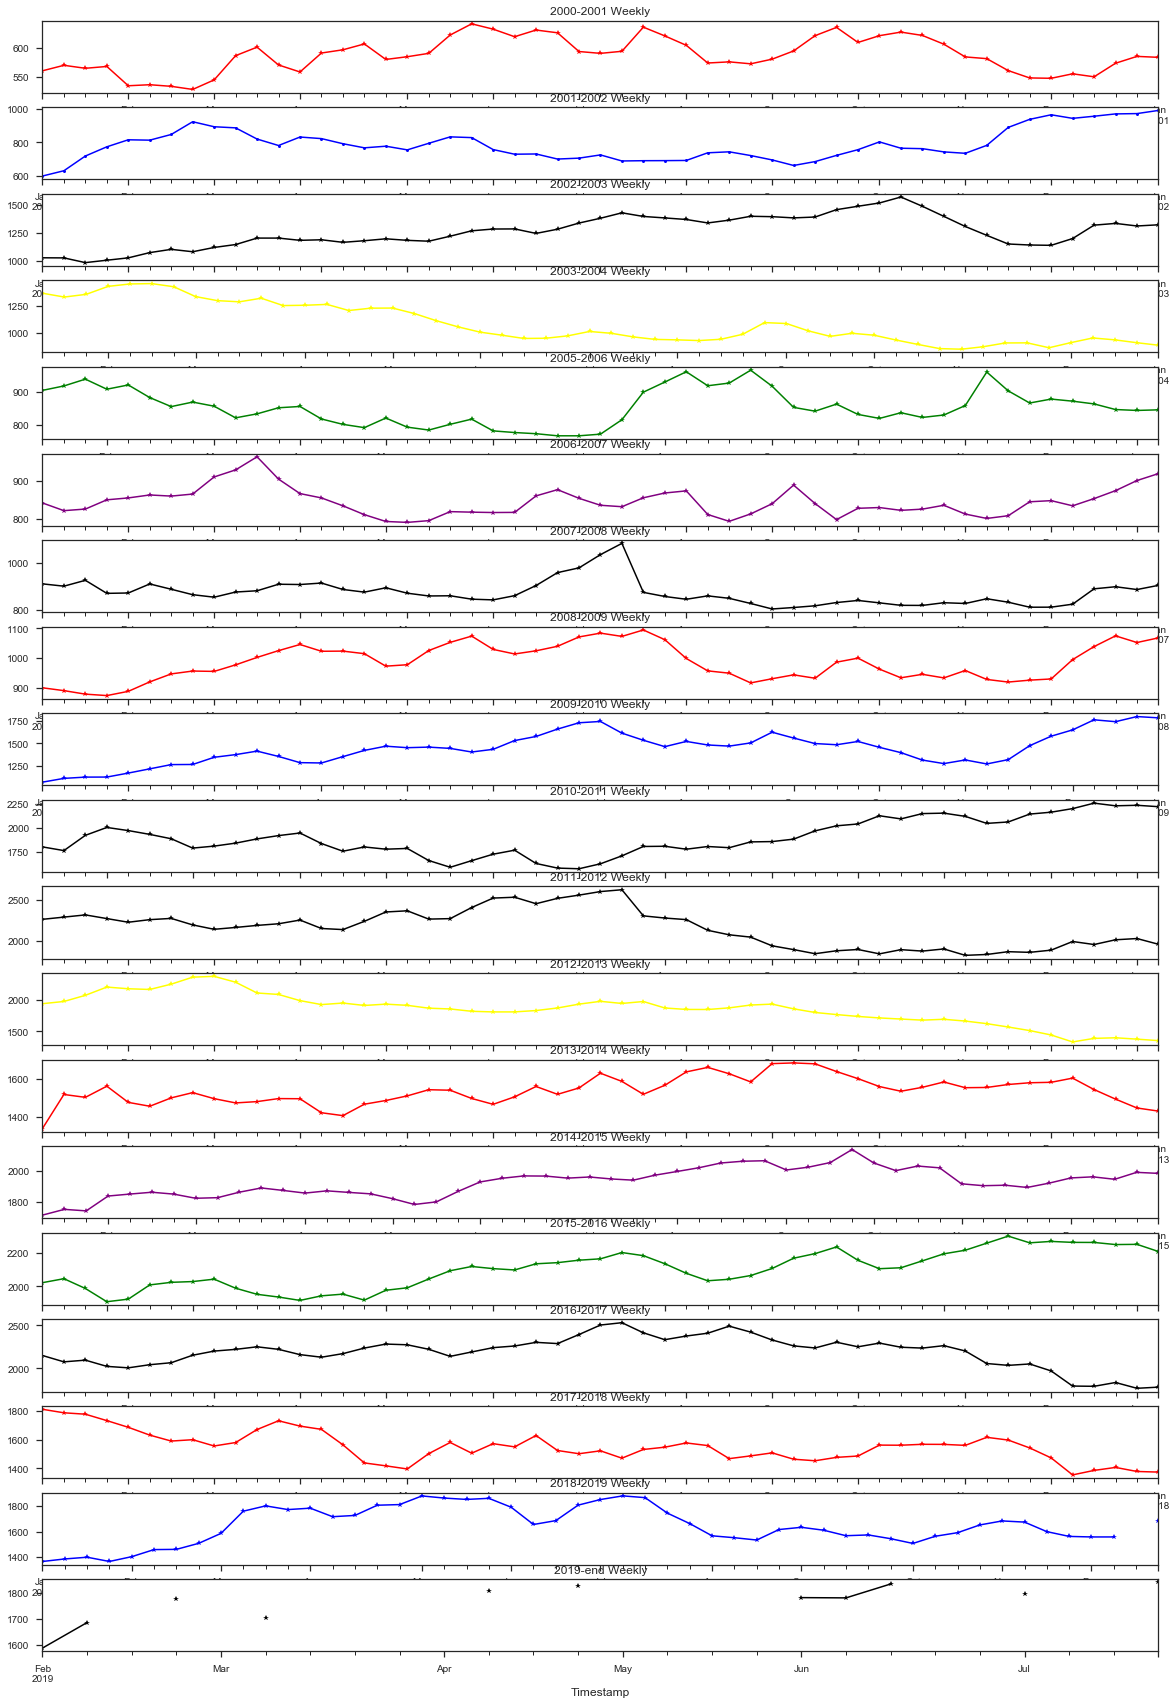

In [235]:
# Resampling the data by weekly in a year
sam1 = df_merge7["2000-01-04":"2001-01-04"].Close_price.resample('W').mean()
sam2 = df_merge7["2001-01-04":"2002-01-04"].Close_price.resample('w').mean()
sam3 = df_merge7["2002-01-04":"2003-01-04"].Close_price.resample('w').mean()
sam4 = df_merge7["2003-01-04":"2004-01-04"].Close_price.resample('w').mean()
sam5 = df_merge7["2004-01-04":"2005-01-04"].Close_price.resample('w').mean()
sam6 = df_merge7["2005-01-04":"2006-01-04"].Close_price.resample('w').mean()
sam7 = df_merge7["2006-01-04":"2007-01-04"].Close_price.resample('w').mean()
sam8 = df_merge7["2007-01-04":"2008-01-04"].Close_price.resample('w').mean()
sam9 = df_merge7["2008-01-04":"2009-01-04"].Close_price.resample('w').mean()
sam10 = df_merge7["2009-01-04":"2010-01-04"].Close_price.resample('w').mean()

sam11 = df_merge7["2010-01-04":"2011-01-04"].Close_price.resample('w').mean()
sam12 = df_merge7["2011-01-04":"2012-01-04"].Close_price.resample('w').mean()
sam13 = df_merge7["2012-01-04":"2013-01-04"].Close_price.resample('w').mean()
sam14 = df_merge7["2014-01-04":"2015-01-04"].Close_price.resample('w').mean()
sam15 = df_merge7["2015-01-04":"2016-01-04"].Close_price.resample('w').mean()
sam16 = df_merge7["2016-01-04":"2017-01-04"].Close_price.resample('w').mean()
sam17 = df_merge7["2017-01-04":"2018-01-04"].Close_price.resample('w').mean()
sam18 = df_merge7["2018-01-04":"2019-01-04"].Close_price.resample('w').mean()
sam19 = df_merge7["2019-01-04":].Close_price.resample('w').mean()

# Ploating
fig, axs = plt.subplots(19,1)
sam1.plot(figsize=(20,30), title= '2000-2001 Weekly', fontsize=10, ax=axs[0], color='red', marker="*")
sam2.plot(figsize=(20,30), title= '2001-2002 Weekly', fontsize=10, ax=axs[1], color='blue', marker=".")
sam3.plot(figsize=(20,30), title= '2002-2003 Weekly', fontsize=10, ax=axs[2], color='black', marker="*")
sam4.plot(figsize=(20,30), title= '2003-2004 Weekly', fontsize=10, ax=axs[3], color='yellow', marker="*")
sam5.plot(figsize=(20,30), title= '2005-2006 Weekly', fontsize=10, ax=axs[4], color='green', marker="*")
sam6.plot(figsize=(20,30), title= '2006-2007 Weekly', fontsize=10, ax=axs[5], color='purple', marker="*")
sam7.plot(figsize=(20,30), title= '2007-2008 Weekly', fontsize=10, ax=axs[6], color='black', marker="*")
sam8.plot(figsize=(20,30), title= '2008-2009 Weekly', fontsize=10, ax=axs[7], color='red', marker="*")
sam9.plot(figsize=(20,30), title= '2009-2010 Weekly', fontsize=10, ax=axs[8], color='blue', marker="*")
sam10.plot(figsize=(20,30), title= '2010-2011 Weekly', fontsize=10, ax=axs[9], color='black', marker="*")

sam11.plot(figsize=(20,30), title= '2011-2012 Weekly', fontsize=10, ax=axs[10], color='black', marker="*")
sam12.plot(figsize=(20,30), title= '2012-2013 Weekly', fontsize=10, ax=axs[11], color='yellow', marker="*")
sam13.plot(figsize=(20,30), title= '2013-2014 Weekly', fontsize=10, ax=axs[12], color='red', marker="*")
sam14.plot(figsize=(20,30), title= '2014-2015 Weekly', fontsize=10, ax=axs[13], color='purple', marker="*")
sam15.plot(figsize=(20,30), title= '2015-2016 Weekly', fontsize=10, ax=axs[14], color='green', marker="*")
sam16.plot(figsize=(20,30), title= '2016-2017 Weekly', fontsize=10, ax=axs[15], color='black', marker="*")
sam17.plot(figsize=(20,30), title= '2017-2018 Weekly', fontsize=10, ax=axs[16], color='red', marker="*")
sam18.plot(figsize=(20,30), title= '2018-2019 Weekly', fontsize=10, ax=axs[17], color='blue', marker="*")
sam19.plot(figsize=(20,30), title= '2019-end Weekly', fontsize=10, ax=axs[18], color='black', marker="*")
plt.show()

<h3 style = "font-family:Bell MT;font-size:40px:text-align:center"> Pattern (Trend, Seasonal, Cyclic) of the four independent variables with Timestamp on Monthly basis(Monthly Seasonal) plot<h3/>

In [236]:
# Changing the name of the columns
df_merge7_name_change = df_merge7.rename(columns = {'LQC(coc_mpys_prfr)':'mpysprfr', 'LQC(coc_mpyn_prfr)':'mpynprfr', 
                              'LQC(coc-mpyns-wdam)':'mpynswdam', 'LQC(coc-mpyn-wdam)':'mpynwdam'}, inplace = True)
#df_merge7.head()

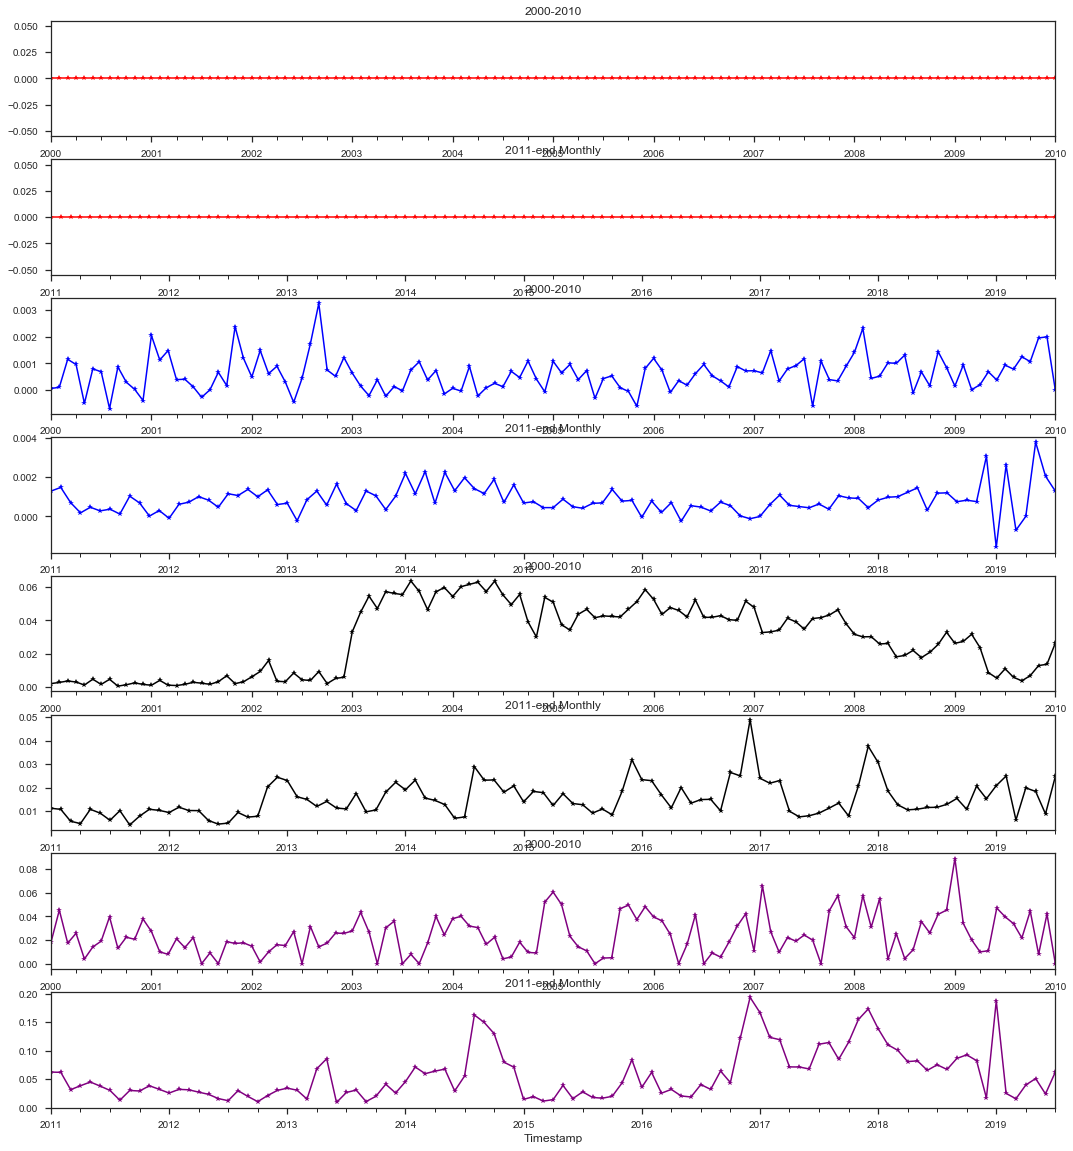

In [237]:
# Weather Damage and Price forecast line plot together
sam1 = df_merge7["2000-01-04":"2010-01-04"].mpysprfr.resample('M').mean()
sam11 = df_merge7["2011-01-04":].mpysprfr.resample('M').mean()

sam2 = df_merge7["2000-01-04":"2010-01-04"].mpynprfr.resample('M').mean()
sam22 = df_merge7["2011-01-04":].mpynprfr.resample('M').mean()

sam3 = df_merge7["2000-01-04":"2010-01-04"].mpynswdam.resample('M').mean()
sam33 = df_merge7["2011-01-04":].mpynswdam.resample('M').mean()

sam4 = df_merge7["2000-01-04":"2010-01-04"].mpynwdam.resample('M').mean()
sam44 = df_merge7["2011-01-04":].mpynwdam.resample('M').mean()


fig, axs = plt.subplots(8,1)

sam1.plot(figsize=(18,20), title= '2000-2010', fontsize=10, ax=axs[0], color='red', marker="*")
sam11.plot(figsize=(18,20), title= '2011-end Monthly', fontsize=10, ax=axs[1], color='red', marker="*")

sam2.plot(figsize=(18,20), title= '2000-2010', fontsize=10, ax=axs[2], color='blue', marker="*")
sam22.plot(figsize=(18,20), title= '2011-end Monthly', fontsize=10, ax=axs[3], color='blue', marker="*")

sam3.plot(figsize=(18,20), title= '2000-2010', fontsize=10, ax=axs[4], color='black', marker="*")
sam33.plot(figsize=(18,20), title= '2011-end Monthly', fontsize=10, ax=axs[5], color='black', marker="*")

sam4.plot(figsize=(18,20), title= '2000-2010', fontsize=10, ax=axs[6], color='purple', marker="*")
sam44.plot(figsize=(18,20), title= '2011-end Monthly', fontsize=10, ax=axs[7], color='purple', marker="*")

#fig.savefig('Weather Damage and Price forecast line plot together')
plt.show()

<h3 style = "font-family:Bell MT;font-size:40px:text-align:center">Additive and multiplicative decomposition plot<h3/>

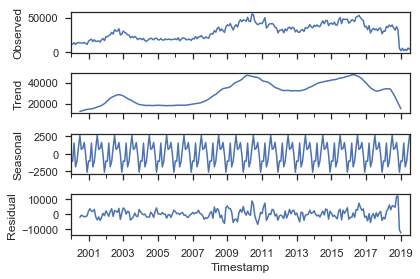

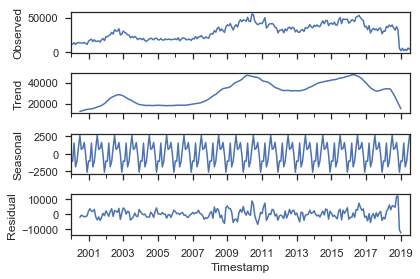

In [238]:
# Close price additive decomposition
dec1 = df_merge7["Close_price"].resample('M').sum()
decomposition = sm.tsa.seasonal_decompose(dec1, model='additive')
decomposition.plot()

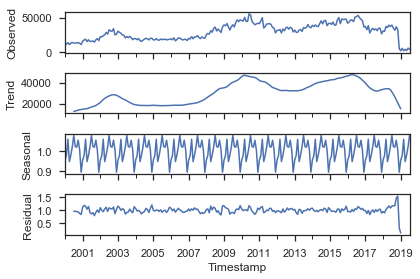

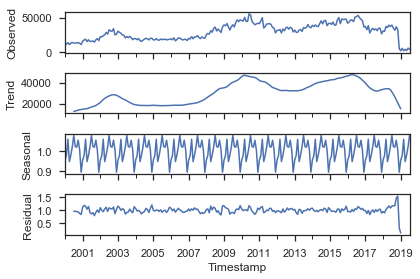

In [239]:
# Close price multiplicative decomposition
decomposition = sm.tsa.seasonal_decompose(dec1, model='multiplicative')
decomposition.plot()

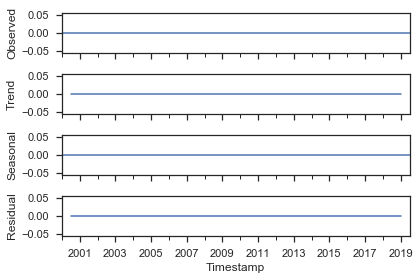

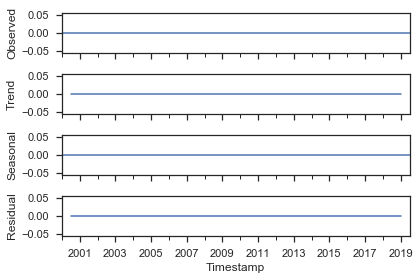

In [240]:
# mpysprfr additive decomposition
dec2 = df_merge7["mpysprfr"].resample('M').sum()
decomposition = sm.tsa.seasonal_decompose(dec2, model='additive')
decomposition.plot()

In [241]:
# mpysprfr multiplicative decomposition
# decomposition = sm.tsa.seasonal_decompose(dec2, model='multiplicative')
# decomposition.plot()
# Result = "ValueError: Multiplicative seasonality is not appropriate for zero and negative values"

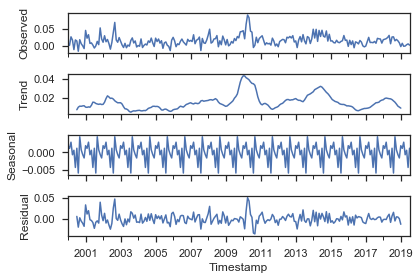

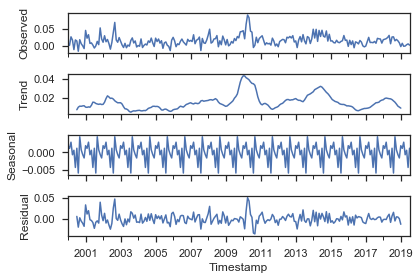

In [242]:
# mpynprfr additive decomposition
dec3 = df_merge7["mpynprfr"].resample('M').sum()
decomposition = sm.tsa.seasonal_decompose(dec3, model='additive')
decomposition.plot()

In [243]:
# mpynprfr multiplicative decomposition
# decomposition = sm.tsa.seasonal_decompose(dec3, model='multiplicative')
# decomposition.plot()
# Result = "ValueError: Multiplicative seasonality is not appropriate for zero and negative values"

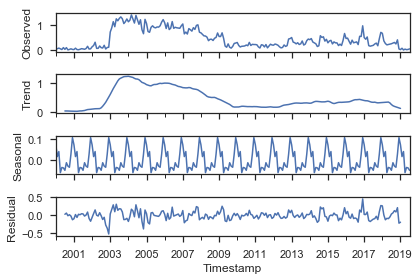

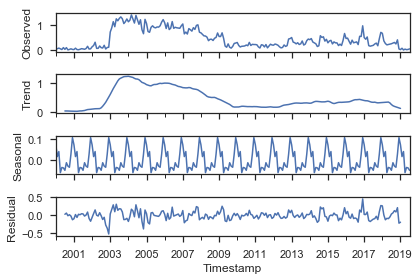

In [244]:
# mpynswdam additive decomposition
dec4 = df_merge7["mpynswdam"].resample('M').sum()
decomposition = sm.tsa.seasonal_decompose(dec4, model='additive')
decomposition.plot()

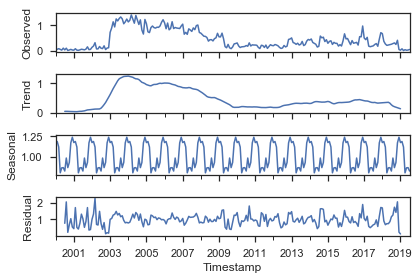

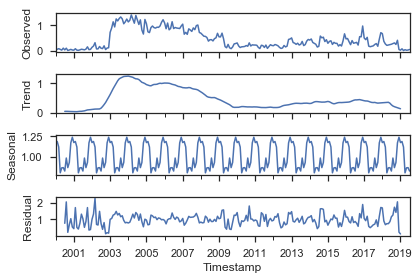

In [245]:
# mpynswdam multiplicative decomposition
decomposition = sm.tsa.seasonal_decompose(dec4, model='multiplicative')
decomposition.plot()

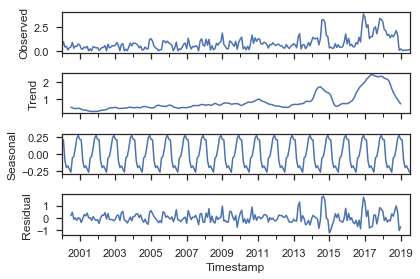

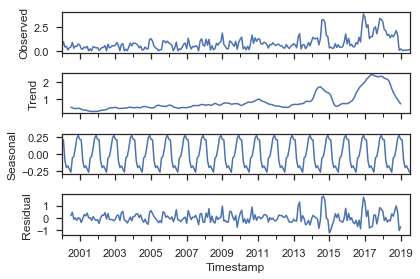

In [246]:
# mpynwdam additive decomposition
dec5 = df_merge7["mpynwdam"].resample('M').sum()
decomposition = sm.tsa.seasonal_decompose(dec5, model='additive')
decomposition.plot()

In [247]:
# mpynwdam multiplicative decomposition
#decomposition = sm.tsa.seasonal_decompose(dec5, model='multiplicative')
#decomposition.plot()
# result = "ValueError: Multiplicative seasonality is not appropriate for zero and negative values"

<h3 style = "font-family:Bell MT;font-size:40px:text-align:center"> Lag plot <h3/>

In [248]:
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


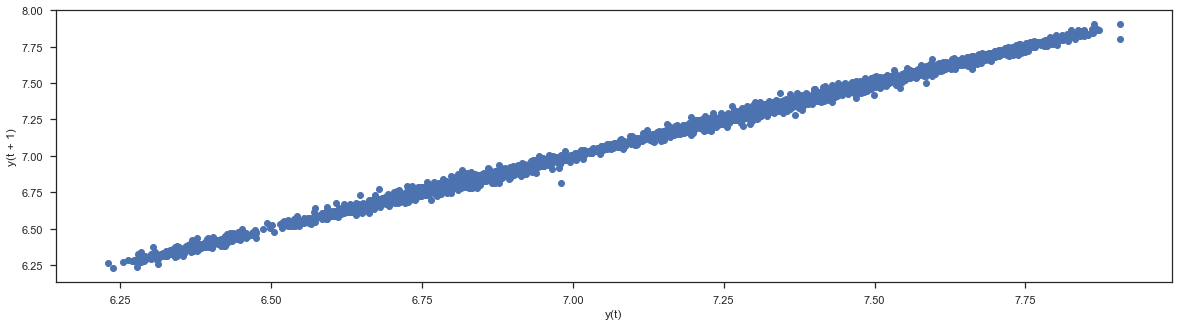

In [249]:
# Lag plot of Close_Price
plt.figure(figsize=(20,5))
lag_plot(np.log(df_merge6['Close_price']))

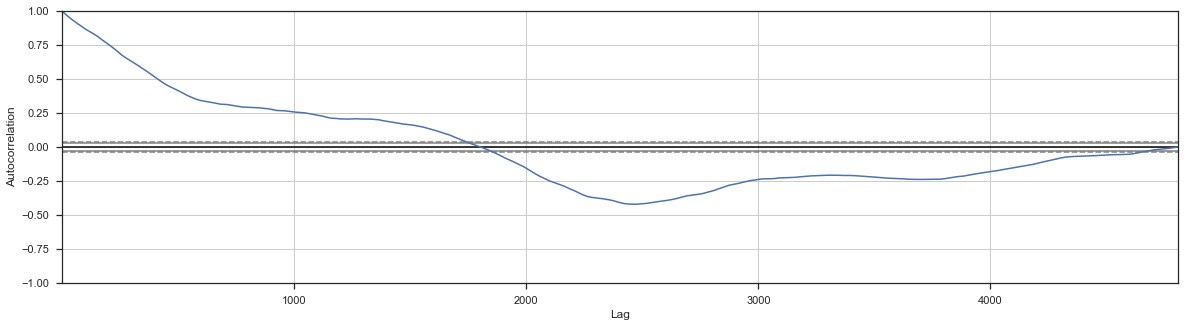

In [250]:
# Autocorrellation plot of Close_price
plt.figure(figsize=(20,5))
autocorrelation_plot(np.log(df_merge6['Close_price']))

C:\Users\fevi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


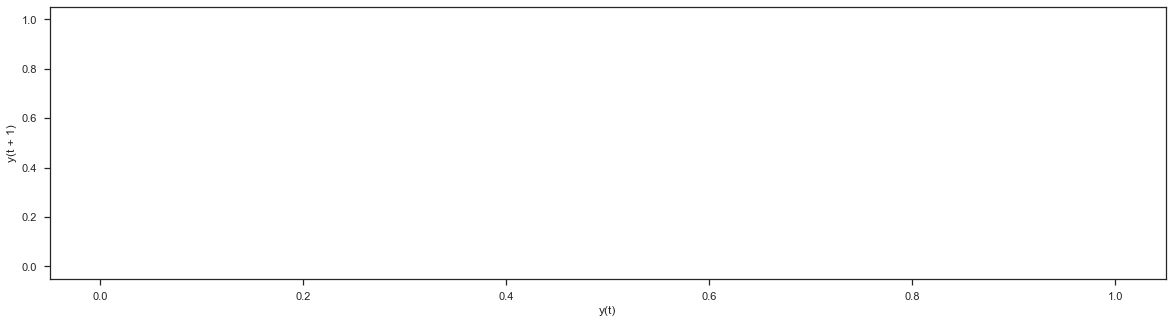

In [251]:
# Lag plot of LQC(coc_mpys_prfr)
plt.figure(figsize=(20,5))
lag_plot(np.log(df_merge6['LQC(coc_mpys_prfr)']))

C:\Users\fevi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\fevi\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:620: RuntimeWarning: invalid value encountered in subtract
  c0 = np.sum((data - mean) ** 2) / float(n)
C:\Users\fevi\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:624: RuntimeWarning: invalid value encountered in subtract
  (data[h:] - mean)).sum() / float(n) / c0


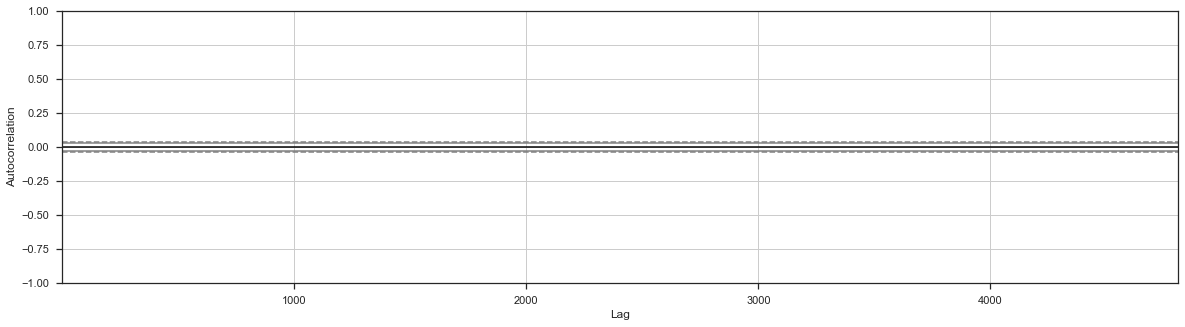

In [252]:
# Autocorrellation plot of LQC(coc_mpys_prfr)
plt.figure(figsize=(20,5))
autocorrelation_plot(np.log(df_merge6['LQC(coc_mpys_prfr)']))

C:\Users\fevi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\fevi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


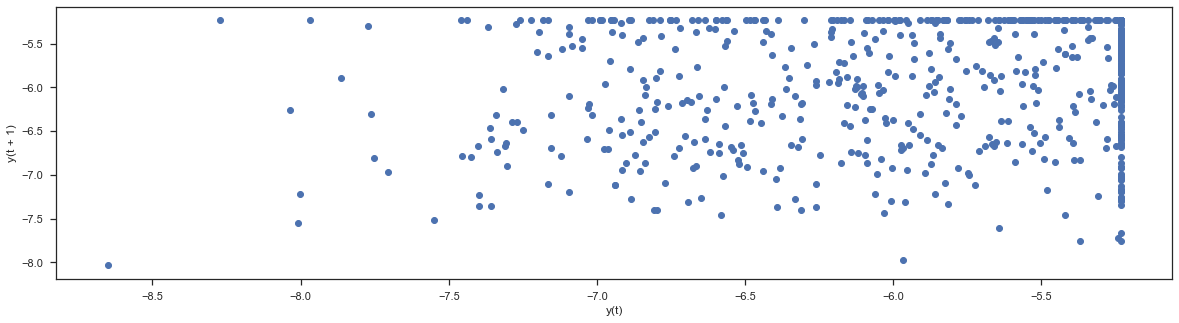

In [253]:
# Lag plot of LQC(coc_mpyn_prfr)
plt.figure(figsize=(20,5))
lag_plot(np.log(df_merge6['LQC(coc_mpyn_prfr)']))

C:\Users\fevi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\fevi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


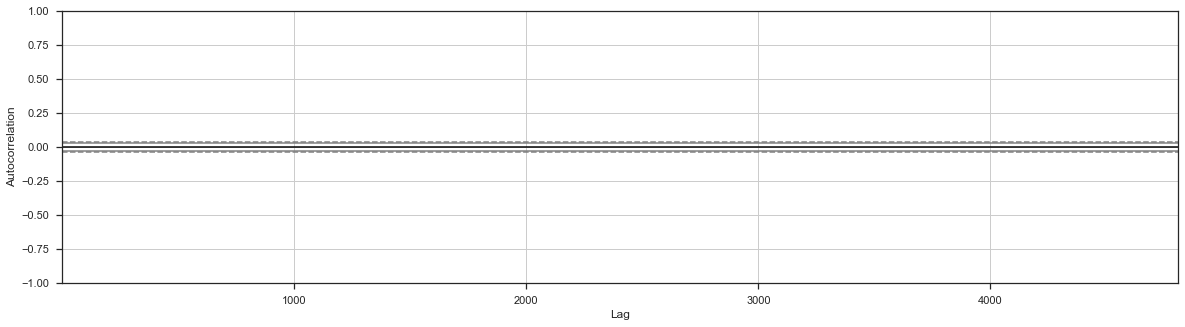

In [254]:
# Autocorrelation plot of LQC(coc_mpyn_prfr)
plt.figure(figsize=(20,5))
autocorrelation_plot(np.log(df_merge6['LQC(coc_mpyn_prfr)']))

C:\Users\fevi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


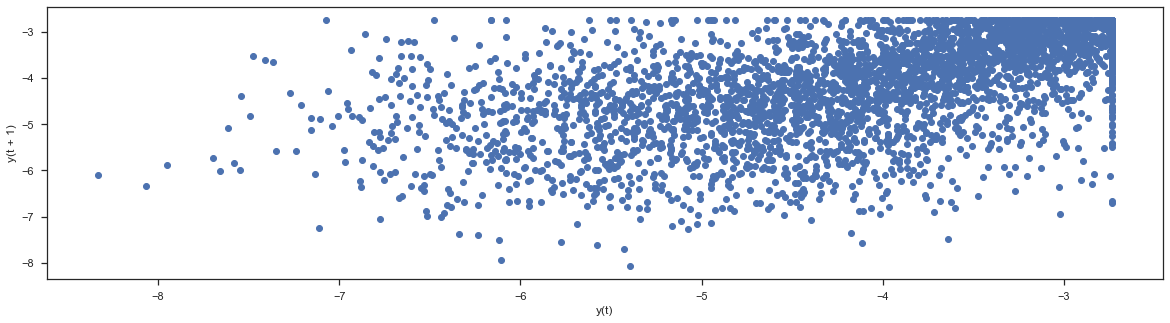

In [255]:
# Lag plot of LQC(coc-mpyns-wdam))
plt.figure(figsize=(20,5))
lag_plot(np.log(df_merge6['LQC(coc-mpyns-wdam)']))

C:\Users\fevi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


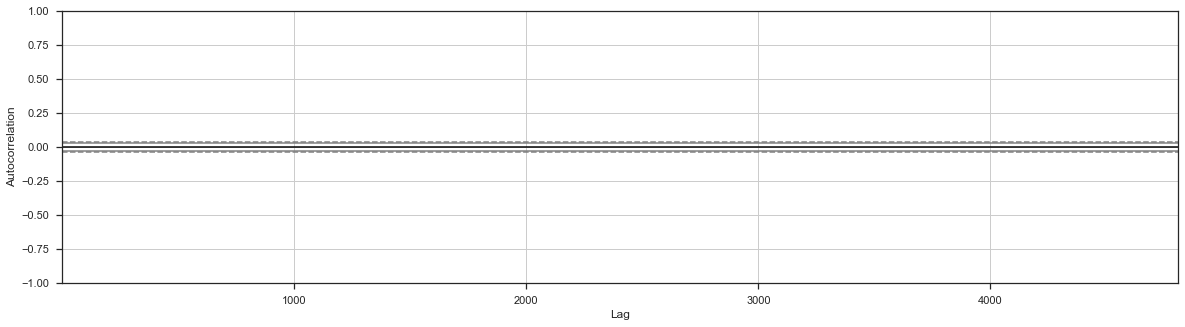

In [256]:
# Autocorrelation plot of LQC(coc-mpyns-wdam)
plt.figure(figsize=(20,5))
autocorrelation_plot(np.log(df_merge6['LQC(coc-mpyns-wdam)']))

C:\Users\fevi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


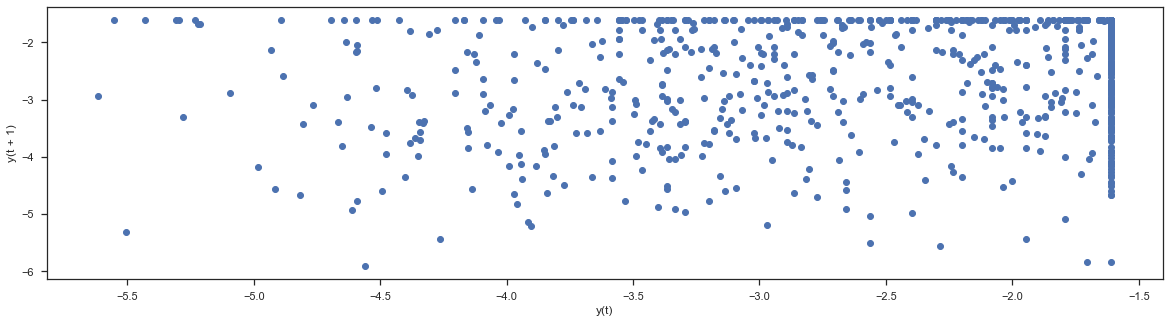

In [257]:
# Lag plot of LQC(coc-mpyn-wdam)
plt.figure(figsize=(20,5))
lag_plot(np.log(df_merge6['LQC(coc-mpyn-wdam)']))

C:\Users\fevi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


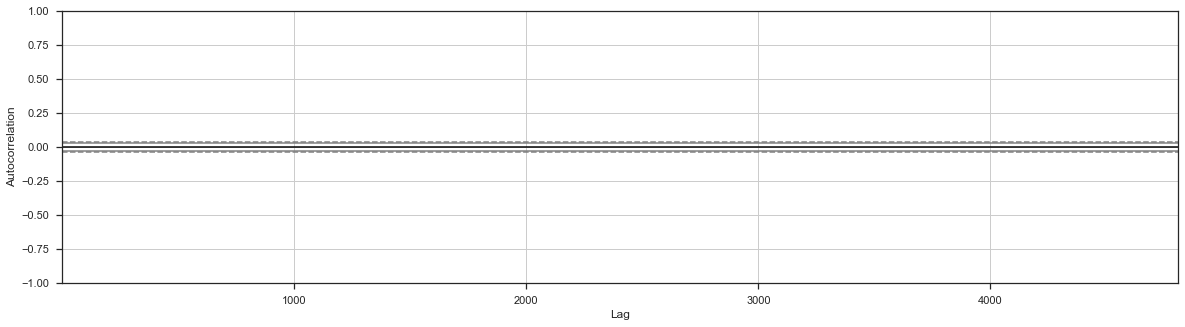

In [258]:
# Autocorrellation of LQC(coc-mpyn-wdam)
plt.figure(figsize=(20,5))
autocorrelation_plot(np.log(df_merge6['LQC(coc-mpyn-wdam)']))

<h3 style = "font-family:Bell MT;font-size:40px:text-align:center"> Split the Series into Training and Testing Data <h3/>

In [259]:
df_merge7 = df_merge7.drop("mpysprfr", axis = 1) # Dropping the all zero data column
#df_merge7.head()

In [260]:
nobs = 15
df_merge7_train, df_merge7_test = df_merge7[0:-nobs], df_merge7[-nobs:]

# Check size
print(df_merge7_train.shape)  
print(df_merge7_test.shape)  

(4793, 4)
(15, 4)


<h3 style = "font-family:Bell MT;font-size:40px:text-align:center"> Transformation(change the non-stationary to stationary) <h3/>

In [261]:
tras_df_merge7 = df_merge7_train.diff().dropna()
tras_df_merge7.head()

,Close_price,mpynprfr,mpynswdam,mpynwdam
Timestamp,,,,
2000-01-05,-1.0,0.000000,0.000000,0.000000
2000-01-06,-4.0,-0.002571,0.006369,0.095238
2000-01-07,8.0,0.004752,-0.006369,-0.095238
2000-01-10,1.0,-0.004752,0.000000,0.000000
2000-01-11,-1.0,0.000000,0.000000,0.000000


In [262]:
tras_df_merge7.describe()

,Close_price,mpynprfr,mpynswdam,mpynwdam
count,4792.000000,4792.000000,4792.000000,4.792000e+03
mean,0.210977,0.000001,0.000001,-2.316826e-20
std,24.652440,0.002928,0.016897,8.587267e-02
min,-268.000000,-0.007908,-0.064757,-2.002619e-01
25%,-11.000000,-0.001716,-0.006874,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000e+00
75%,13.000000,0.001670,0.006809,0.000000e+00
max,145.000000,0.007908,0.064757,2.002619e-01


In [263]:
#from statsmodels.tsa.stattools import adfuller # Do the data Stationary

In [264]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output={'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length=6): return str(val).ljust(length)
    
    print(f'    Augumented Dickey-Fuller Test on "{name}"', "\n  ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level   ={signif}')
    print(f' Test Statistic       ={output["test_statistic"]}')
    print(f' No. Lags Chosen      ={output["n_lags"]}')
          
    for key,val in r[4].items():
          print(f' Critical value {adjust(key)} = {round(val, 3)}')
          
    if p_value <= signif:
          print(f" => p-value = {p_value}. Rejecting Null Hypothesis.")
          print(f" => Series is stationary.")
    else:
          print(f" => P-value = {p_value}. Weak evidence to reject the Null Hypothesis.")
          print(f" => Series is Non-Stationary.")
          
# ADF test on each column
for name, column in tras_df_merge7.iteritems():
          adfuller_test(column, name=column.name)
          print('\n')

    Augumented Dickey-Fuller Test on "Close_price" 
   -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level   =0.05
 Test Statistic       =-66.7692
 No. Lags Chosen      =0
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => p-value = 0.0. Rejecting Null Hypothesis.
 => Series is stationary.


    Augumented Dickey-Fuller Test on "mpynprfr" 
   -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level   =0.05
 Test Statistic       =-20.7938
 No. Lags Chosen      =29
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => p-value = 0.0. Rejecting Null Hypothesis.
 => Series is stationary.


    Augumented Dickey-Fuller Test on "mpynswdam" 
   -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level   =

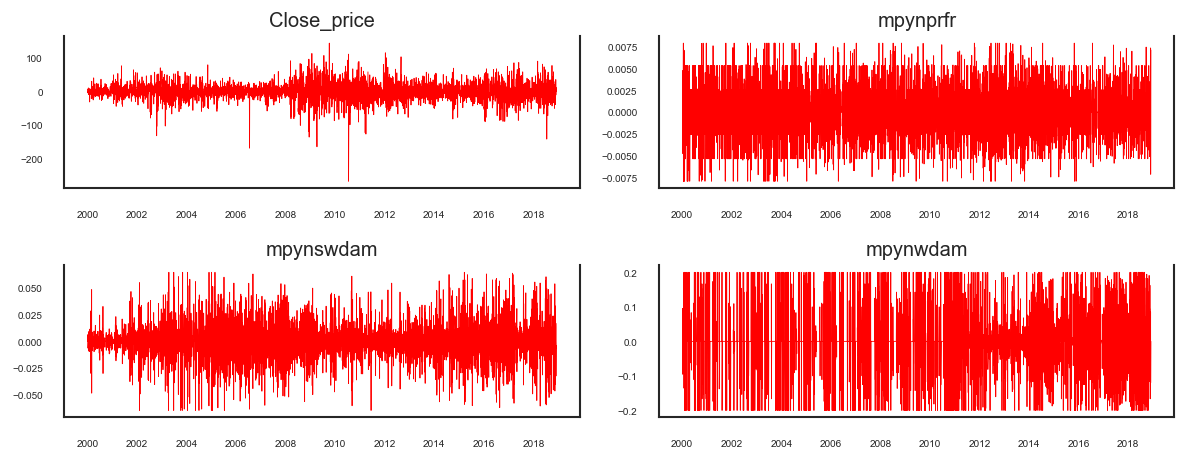

In [265]:
# Plot  (sam1.plot(figsize=(18,20), title= '2000-2010', fontsize=10, ax=axs[0], color='red', marker="*"))
fig, axes = plt.subplots(nrows= 2, ncols = 2, dpi=120, figsize=(10,4))
for i, ax in enumerate(axes.flatten()):
    data = tras_df_merge7[tras_df_merge7.columns[i]]
    ax.plot(data, color = 'red', linewidth = 0.5)
    
    ax.set_title(tras_df_merge7.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize = 6)
plt.tight_layout();   

<h3> Testing Causation using Granger’s Causality Test <h3/>

In [266]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df_merge7_train = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df_merge7_train.columns:
        for r in df_merge7_train.index:
            test_result=grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'y = {r}, X = {c}, p values = {p_values}')
            min_p_value = np.min(p_values)
            df_merge7_train.loc[r, c] = min_p_value
    df_merge7_train.columns = [var +'_x' for var in variables]
    df_merge7_train.index = [var + '_y' for var in variables]
    return df_merge7_train
grangers_causation_matrix(df_merge7_train, variables = df_merge7_train.columns)

,Close_price_x,mpynprfr_x,mpynswdam_x,mpynwdam_x
Close_price_y,1.0,0.0694,0.4696,0.4098
mpynprfr_y,0.0,1.0000,0.0000,0.6699
mpynswdam_y,0.0,0.2430,1.0000,0.0005
mpynwdam_y,0.0,0.1070,0.0174,1.0000


<h3> Co-integration Test <h3/>

In [267]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(tras_df_merge7, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(tras_df_merge7,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(tras_df_merge7.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_merge7_train)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Close_price ::  894.6     > 40.1749   =>   True
mpynprfr ::  338.35    > 24.2761   =>   True
mpynswdam ::  49.71     > 12.3212   =>   True
mpynwdam ::  0.04      > 4.1296    =>   False


In [268]:
mod = smt.VAR(tras_df_merge7)
res = mod.fit(maxlags=15, ic='aic')
print(res.summary())

C:\Users\fevi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 09, Jan, 2020
Time:                     02:02:15
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -19.5961
Nobs:                     4777.00    HQIC:                  -19.8106
Log likelihood:           20725.8    FPE:                2.21794e-09
AIC:                     -19.9267    Det(Omega_mle):     2.10817e-09
--------------------------------------------------------------------
Results for equation Close_price
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.212314         0.357270            0.594           0.552
L1.Close_price          0.038792         0.014626            2.652           0.008
L1.mpynprfr          -164.578333       161.760

In [269]:
out = durbin_watson(res.resid)

for col, val in zip(tras_df_merge7.columns, out):
    print((col), ':', round(val, 2))

Close_price : 2.0
mpynprfr : 2.0
mpynswdam : 2.01
mpynwdam : 2.0


<h3> Prediction <h3/>

In [270]:
predi = res.forecast(tras_df_merge7.values[:], 15)
predi_df = pd.DataFrame(predi, index=df_merge7.index[-15:], columns= df_merge7.columns)
predi_df

,Close_price,mpynprfr,mpynswdam,mpynwdam
Timestamp,,,,
2018-12-07,-2.208581,-0.004251,0.011154,0.059534
2018-12-20,-1.125138,-0.000509,0.004352,0.015297
2019-01-30,0.002517,0.000079,-0.001436,-0.015367
2019-02-01,4.390104,-0.000206,0.002413,0.001835
2019-02-08,1.185070,0.000123,-0.002935,0.004011
2019-02-19,0.663031,0.000224,0.002126,0.001353
2019-03-08,1.188051,0.000239,-0.003192,-0.005395
2019-04-10,1.744169,-0.000270,-0.000235,-0.000612
2019-04-24,-4.486818,-0.000033,0.001100,-0.006240


<h3> Invert the transformation to get the real forecast <h3/>

In [271]:
predi_inverse = predi_df.cumsum()
f = predi_inverse + df_merge7_test
print(f)

            Close_price  mpynprfr  mpynswdam  mpynwdam
Timestamp                                             
2018-12-07  1542.791419 -0.001641   0.029351  0.077471
2018-12-20  1681.666280 -0.003473   0.037436  0.107998
2019-01-30  1578.668797 -0.006267   0.034952  0.246964
2019-02-01  1592.058901 -0.002225   0.028702  0.094856
2019-02-08  1688.243972 -0.000645   0.039893  0.086523
2019-02-19  1780.907003 -0.003443   0.052060  0.087249
2019-03-08  1707.095054 -0.005009   0.018719  0.076942
2019-04-10  1815.839223 -0.004571   0.024103  0.091094
2019-04-24  1830.352405 -0.004605   0.041350  0.103786
2019-05-29  1784.826577 -0.000656   0.034947  0.105921
2019-06-06  1781.804451  0.000701   0.024185  0.065581
2019-06-11  1836.754587 -0.005431   0.025978  0.073040
2019-06-13  1837.792468 -0.002352   0.018928  0.091229
2019-07-04  1800.310183 -0.006721   0.048225  0.127554
2019-07-24  1846.230816  0.000673   0.029083  0.111131


<h3> Plot of Forecast vs Actual <h3/>

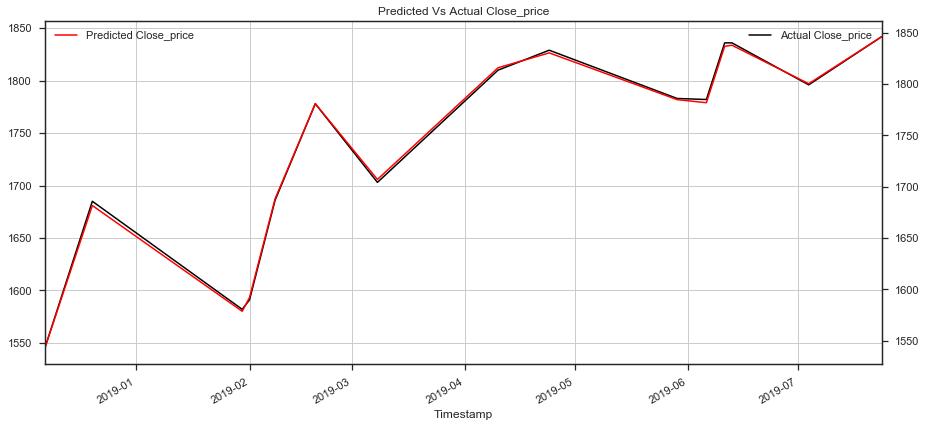

In [274]:
plt.figure(figsize= (15,7))
plt.xlabel("Timestamp")

ax1 = df_merge7_test.Close_price.plot(color = 'black', grid = True, label = 'Actual Close_price')
ax2 = f.Close_price.plot(color = 'red', grid = True, secondary_y = True, label = 'Predicted Close_price')

ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title('Predicted Vs Actual Close_price')
plt.show()